# King County Housing with Multiple Linear Regression

### By: Eric Romano, Christian Moya

## Notebook 1: Data Preparation w/ Transformation Techniques

This notebook contains the process we used to prepare the dataframe for creating linear regression model. This process will include various techniques to transfrom our data. The purpose of this notebook is to show how and why these tranfromation techniques are used.
For a step-by-step process on how we compiled and scrubbed our data set look into the notebook titled 'Understanding_the_Data&Compiling_Dataset'.

In [1]:
# for webscraping
import os 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time 
import sys
import numpy as np
import pandas as pd 
import regex as re 
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers 
import htmltext

# for visuals using geopandas
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes
import haversine as hs
import folium

# for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import gaussian_kde
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
import adjustText as aT
import shapely.speedups
shapely.speedups.enable()

# for stats (min,max,mean)
import statistics
from numpy import mean
from numpy import std 

# statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Full dataset with all features

In [2]:
df = pd.read_csv('data_pred5.csv')

In [3]:
df.head()

,price,bathrooms,sqft_lot,sqft_living,waterfront,grade,zipcode,lat,long,district,...,ef_School_K_12,transport_dist,medical_dist,police_station_dist,prop_crime,viol_crime,totalcrime_percapita,walking_score,bins_walk_score,bins_total_crime
0,538000.0,2.25,7242,2570,0.0,7,98125,47.7210,-122.319,seattle,...,33.422989,2.200032,1.520117,2.329885,23.132246,27.758696,50.890942,69,3.0,1.0
1,180000.0,1.00,10000,770,0.0,6,98028,47.7379,-122.233,northshore,...,6.805255,10.578848,3.526628,2.797147,29.999053,12.856737,42.855790,14,1.0,1.0
2,604000.0,3.00,5000,1960,0.0,7,98136,47.5208,-122.393,seattle,...,41.371852,9.593575,2.501342,2.876385,6.126509,6.126509,12.253018,74,4.0,1.0
3,510000.0,2.00,8080,1680,0.0,8,98074,47.6168,-122.045,lake washington,...,7.330850,13.590865,14.881427,14.495456,34.277996,10.283399,44.561395,9,1.0,1.0
4,257500.0,2.25,6819,1715,0.0,7,98003,47.3097,-122.327,federal way,...,12.814386,1.894400,0.607868,0.638233,122.372846,70.213928,192.586773,65,3.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 30 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
waterfront                      18109 non-null float64
grade                           18109 non-null int64
zipcode                         18109 non-null int64
lat                             18109 non-null float64
long                            18109 non-null float64
district                        18109 non-null object
grades                          18109 non-null object
grade_rank                      18109 non-null int64
coor                            18109 non-null object
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002332DB24550>,
      dtype=object)

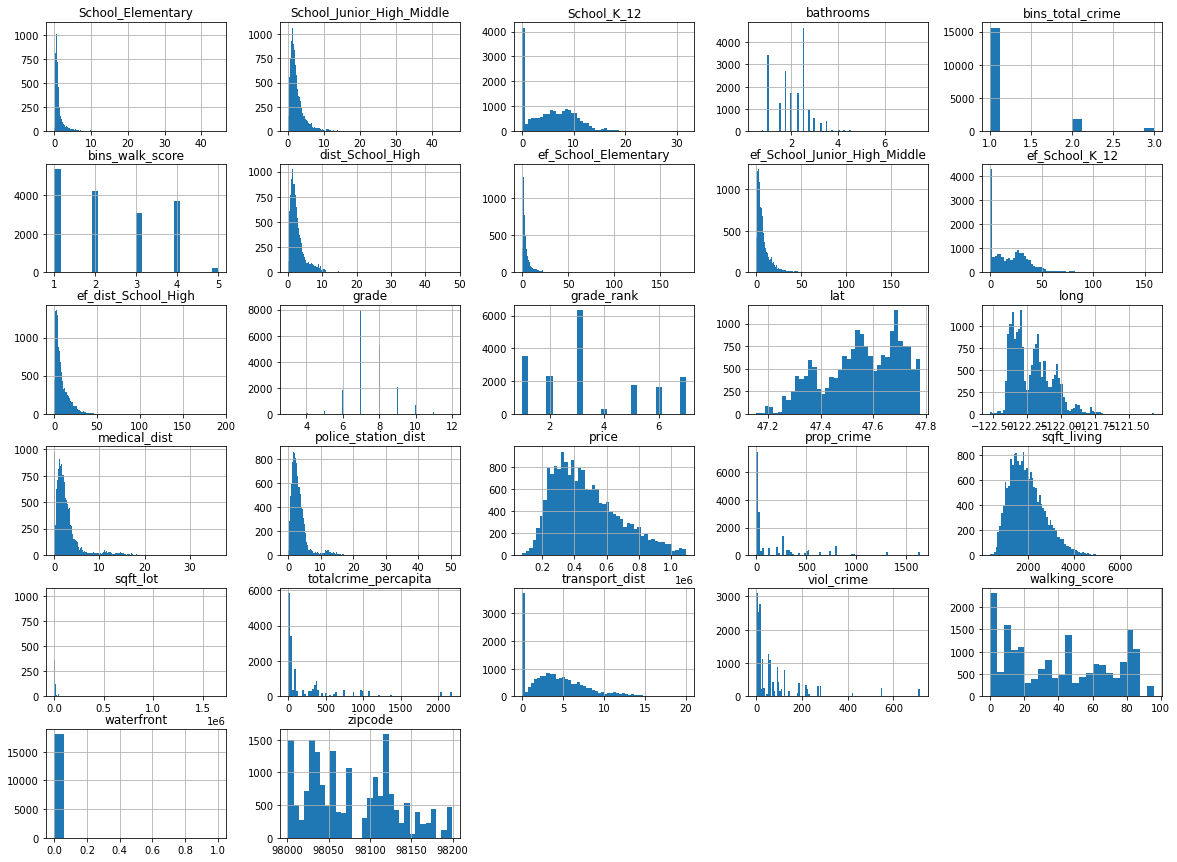

In [5]:
df.hist(figsize=(20,15), bins='auto')

In [6]:
['School_Junior_High_Middle','dist_School_High','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','medical_dist','police_station_dist','sqft_living','sqft_lot']

['School_Junior_High_Middle',
 'dist_School_High',
 'ef_School_Junior_High_Middle',
 'ef_dist_School_High',
 'ef_School_Elementary',
 'medical_dist',
 'police_station_dist',
 'sqft_living',
 'sqft_lot']

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.7118749280305955
Kurtosis: -0.10538155361583268


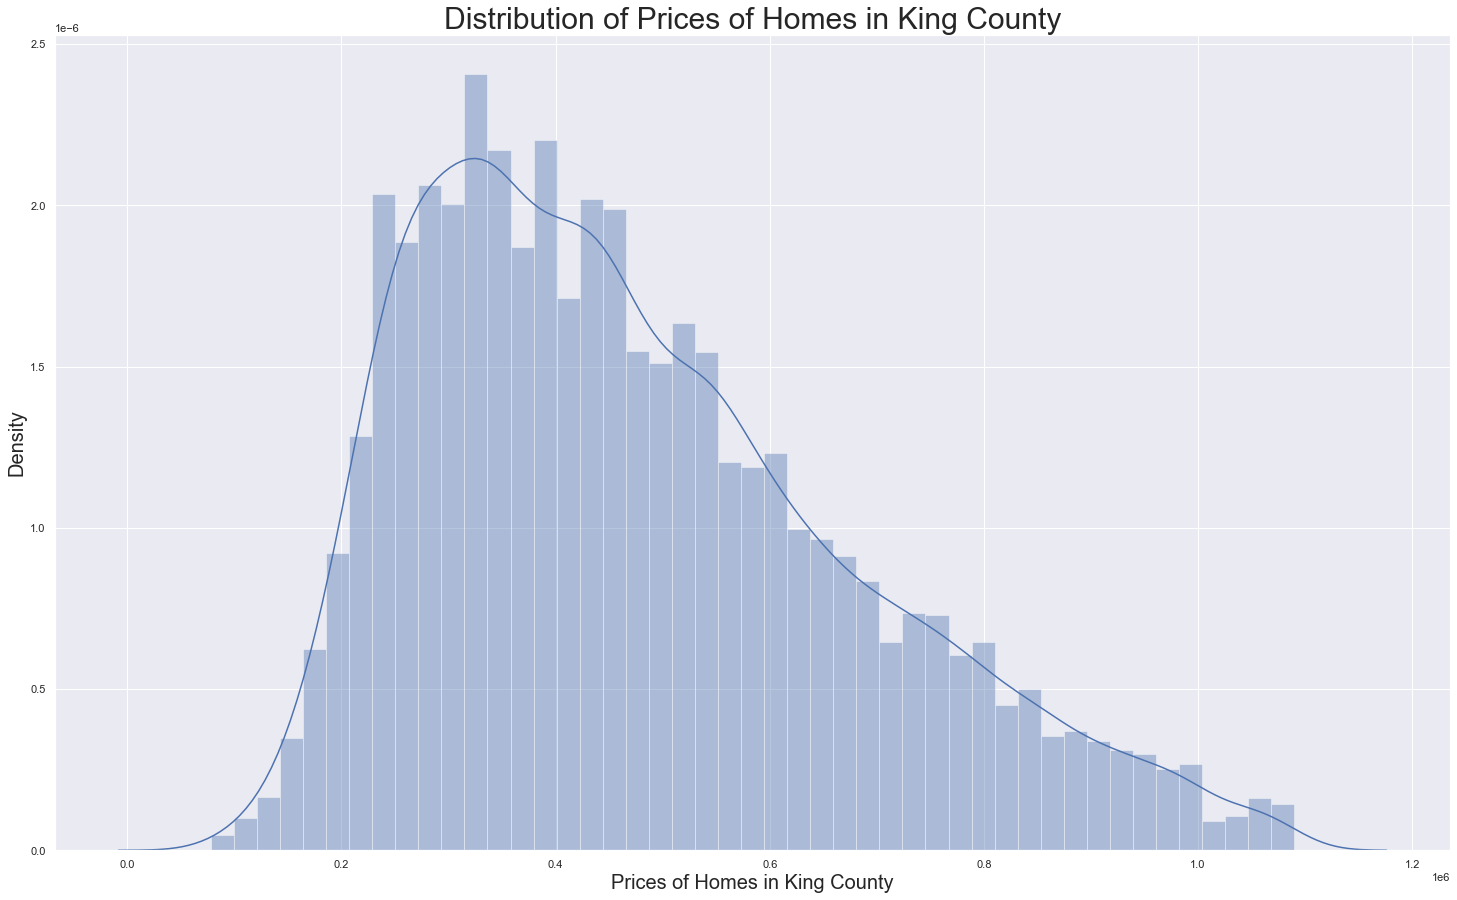

In [7]:
## I will first start off with transforming the price, I will all be adding these transformed features onto an empty df.
sns.set()
plt.figure(figsize=(25,15))
sns.distplot(df['price'])
plt.title('Distribution of Prices of Homes in King County', fontsize=30)
plt.xlabel('Prices of Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['price'].skew())
print('Kurtosis:', df['price'].kurt())

In [8]:
# Creating an empty df to add transformed features
df_norm = pd.DataFrame()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.19628654291416453
Kurtosis: -0.3810820923590543


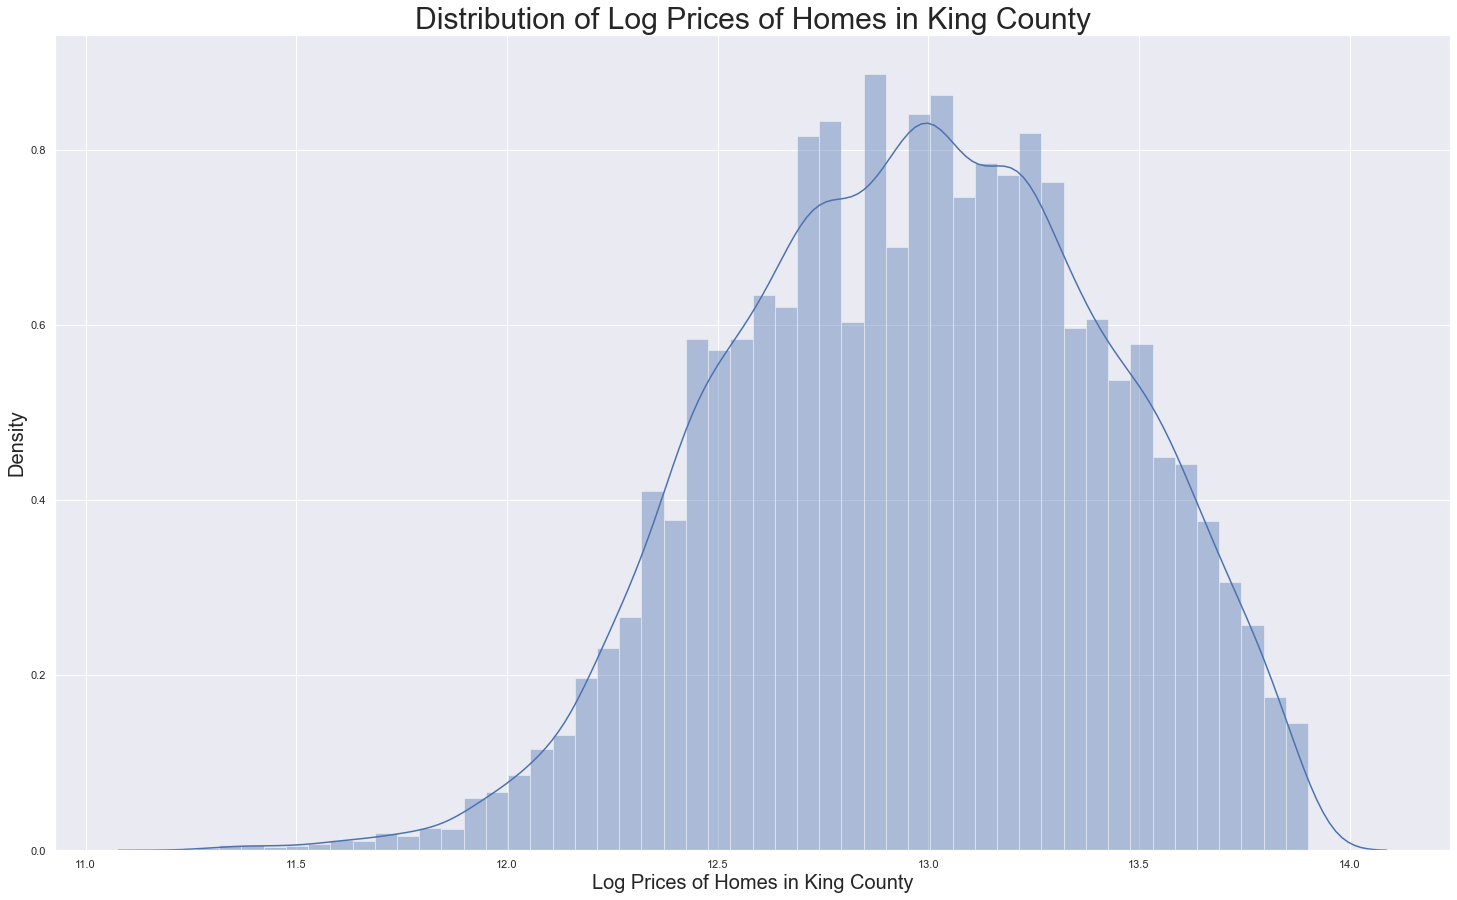

In [9]:
df_norm['log_price'] = df['price'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_price'])
plt.title('Distribution of Log Prices of Homes in King County', fontsize=30)
plt.xlabel('Log Prices of Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_price'].skew())
print('Kurtosis:', df_norm['log_price'].kurt())

In [10]:
df['School_dist_avg'] = (df['School_K_12'] + df['School_Junior_High_Middle'] + df['dist_School_High'] + df['School_Elementary'])/4

In [11]:
df['ef_School_dist_avg'] = (df['ef_School_K_12'] + df['ef_School_Junior_High_Middle'] + df['ef_dist_School_High'] + df['ef_School_Elementary'])/4

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.85879090508567


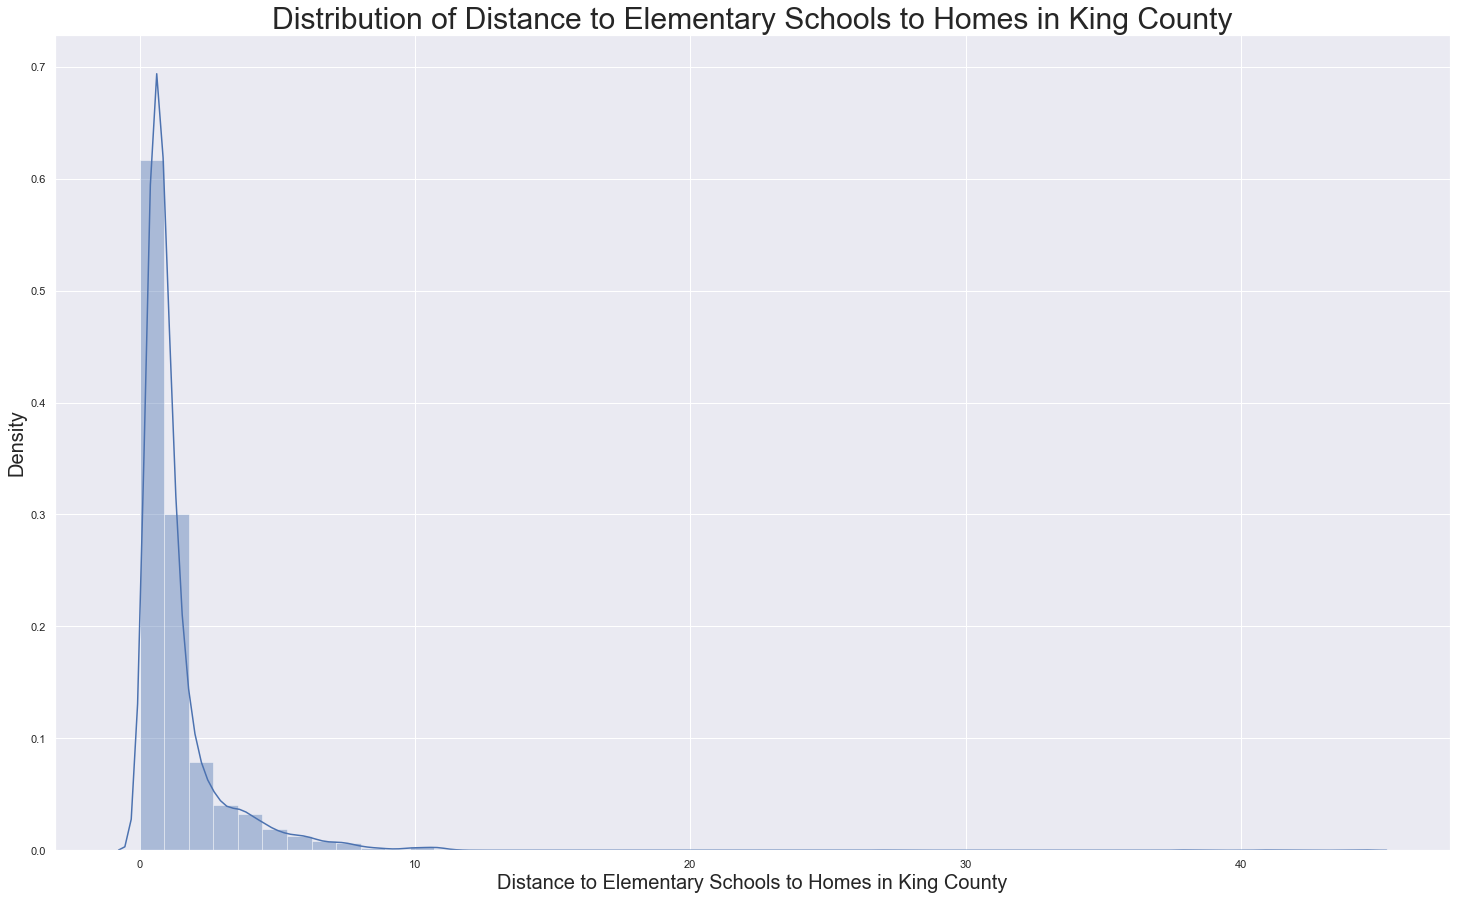

In [12]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_Elementary'])
plt.title('Distribution of Distance to Elementary Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to Elementary Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.33895851441057107
Kurtosis: 0.5101411600171266


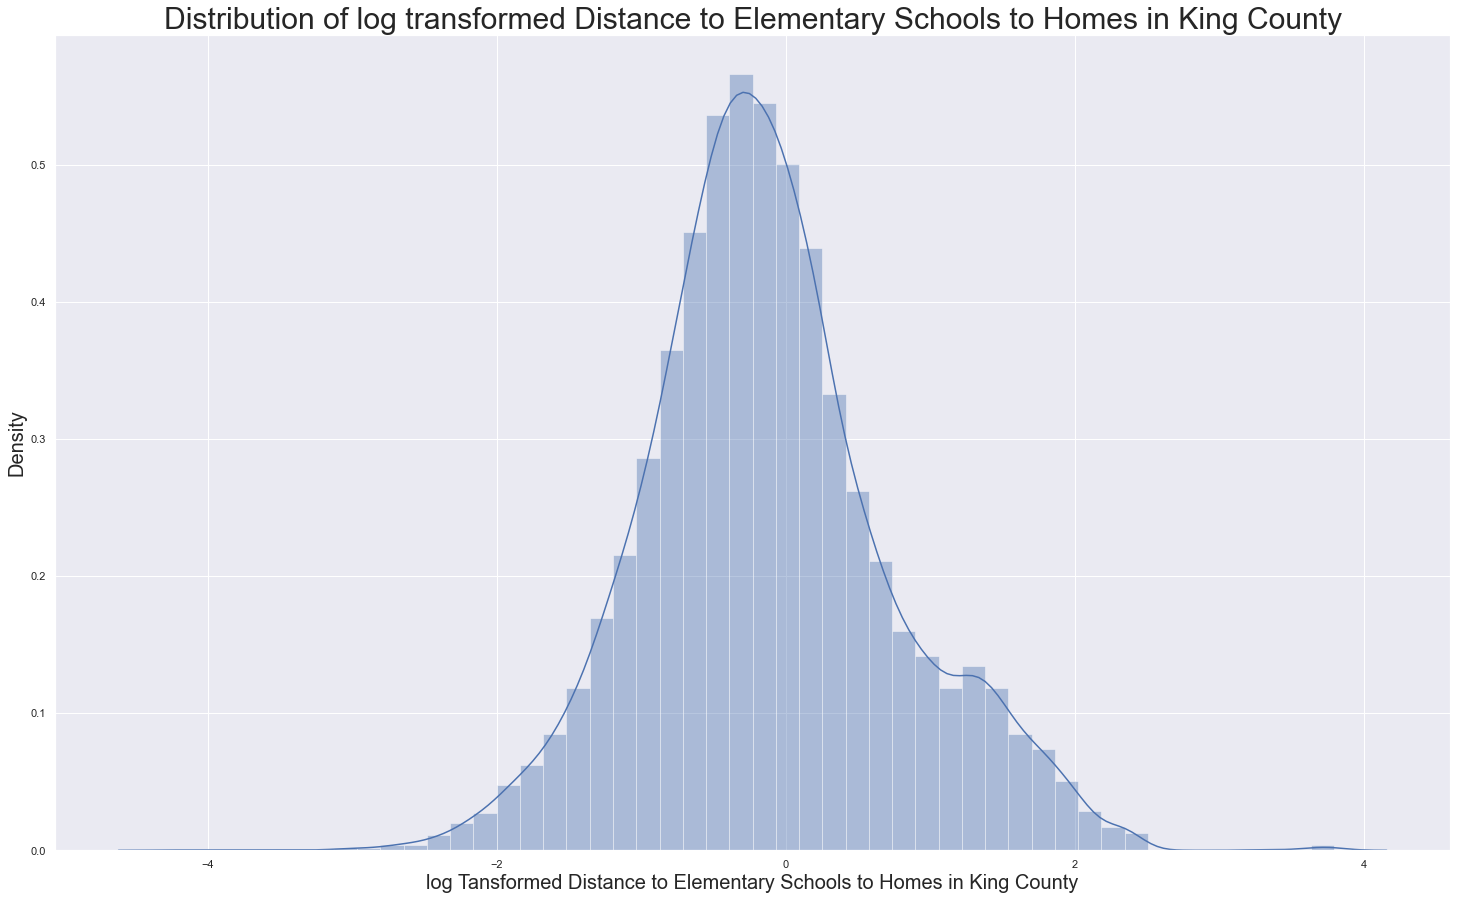

In [13]:
df_norm['log_School_Elementary'] = df['School_Elementary'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_School_Elementary'])
plt.title('Distribution of log transformed Distance to Elementary Schools to Homes in King County', fontsize=30)
plt.xlabel('log Tansformed Distance to Elementary Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_School_Elementary'].skew())
print('Kurtosis:', df_norm['log_School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.85879090508567


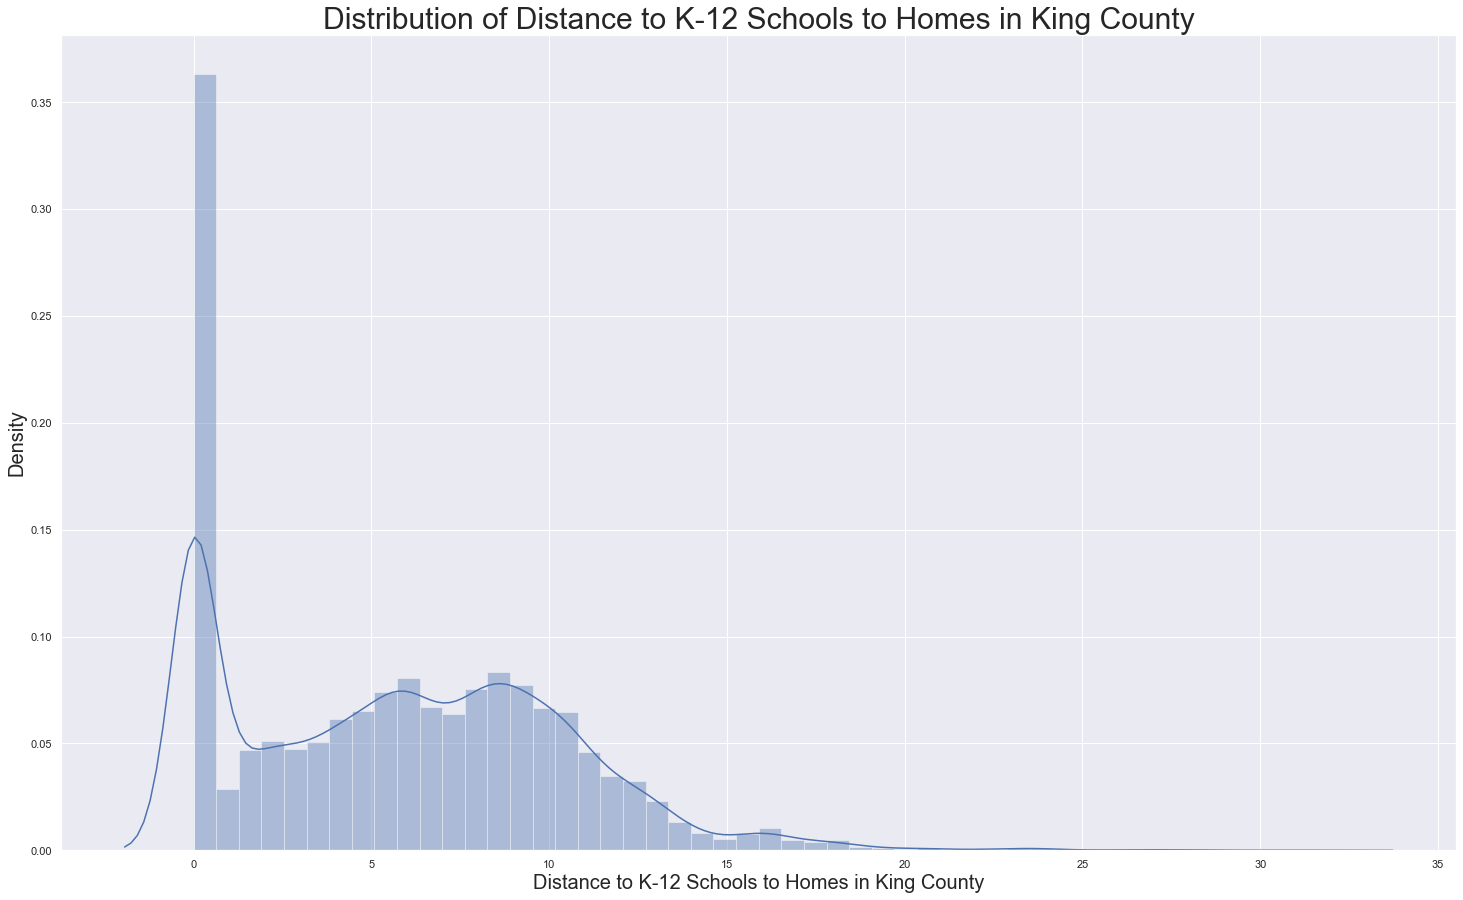

In [14]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_K_12'])
plt.title('Distribution of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

In [15]:
# I noticed that there are alot of values that have zero. I need to either delete these rows or create a new value for them.
# To keep them I will place them towards the end by giving all zeros the max value. 
df.loc[df['School_K_12']==0.0]

,price,bathrooms,sqft_lot,sqft_living,waterfront,grade,zipcode,lat,long,district,...,medical_dist,police_station_dist,prop_crime,viol_crime,totalcrime_percapita,walking_score,bins_walk_score,bins_total_crime,School_dist_avg,ef_School_dist_avg
7,323000.0,2.5,6560,1890,0.0,7,98038,47.3684,-122.031,tahoma,...,2.208031,2.861200,257.413970,123.111029,380.524999,3,1.0,1.0,1.097997,2.195994
13,395000.0,2.0,14040,1890,0.0,7,98019,47.7277,-121.962,riverview,...,0.000000,2.314498,234.768541,80.954669,315.723210,0,NaN,1.0,3.475979,13.903915
25,580500.0,2.5,3980,2320,0.0,8,98027,47.5391,-122.070,issaquah,...,1.479626,2.858131,318.265385,54.651632,372.917017,0,NaN,1.0,2.244368,2.244368
39,488000.0,2.5,13603,3160,0.0,8,98019,47.7443,-121.977,riverview,...,0.000000,0.824546,234.768541,80.954669,315.723210,0,NaN,1.0,3.708268,14.833073
41,785000.0,2.5,13416,2290,0.0,9,98007,47.6194,-122.151,bellevue,...,1.186892,1.455400,3.427558,3.427558,6.855116,54,3.0,1.0,0.480940,0.480940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,337000.0,2.5,5100,2470,0.0,8,98038,47.3622,-122.041,tahoma,...,1.209959,3.249969,257.413970,123.111029,380.524999,3,1.0,1.0,1.497013,2.994026
18080,785000.0,3.5,4684,3070,0.0,10,98027,47.5316,-122.076,issaquah,...,2.362969,3.141058,318.265385,54.651632,372.917017,0,NaN,1.0,2.423039,2.423039
18085,594866.0,3.0,6000,2780,0.0,9,98065,47.5184,-121.886,snoqualmie valley,...,0.670390,1.237607,499.099063,126.354193,625.453256,0,NaN,1.0,2.972254,8.916761
18086,625000.0,3.0,6000,2780,0.0,9,98065,47.5184,-121.886,snoqualmie valley,...,0.670390,1.237607,499.099063,126.354193,625.453256,0,NaN,1.0,2.972254,8.916761


In [16]:
df['School_K_12'].max()

31.78707957209475

In [17]:
# Before transforming the feature distance to K-12 I need to change the values that have zeros in them 
df.loc[df['School_K_12']==0, 'School_K_12']=(df['School_K_12'].max()+1)
# I will replace these values with values that are close to the max. I will assume that values that are futhest from a school is
# comparable to the ones that have no near by school

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.85879090508567


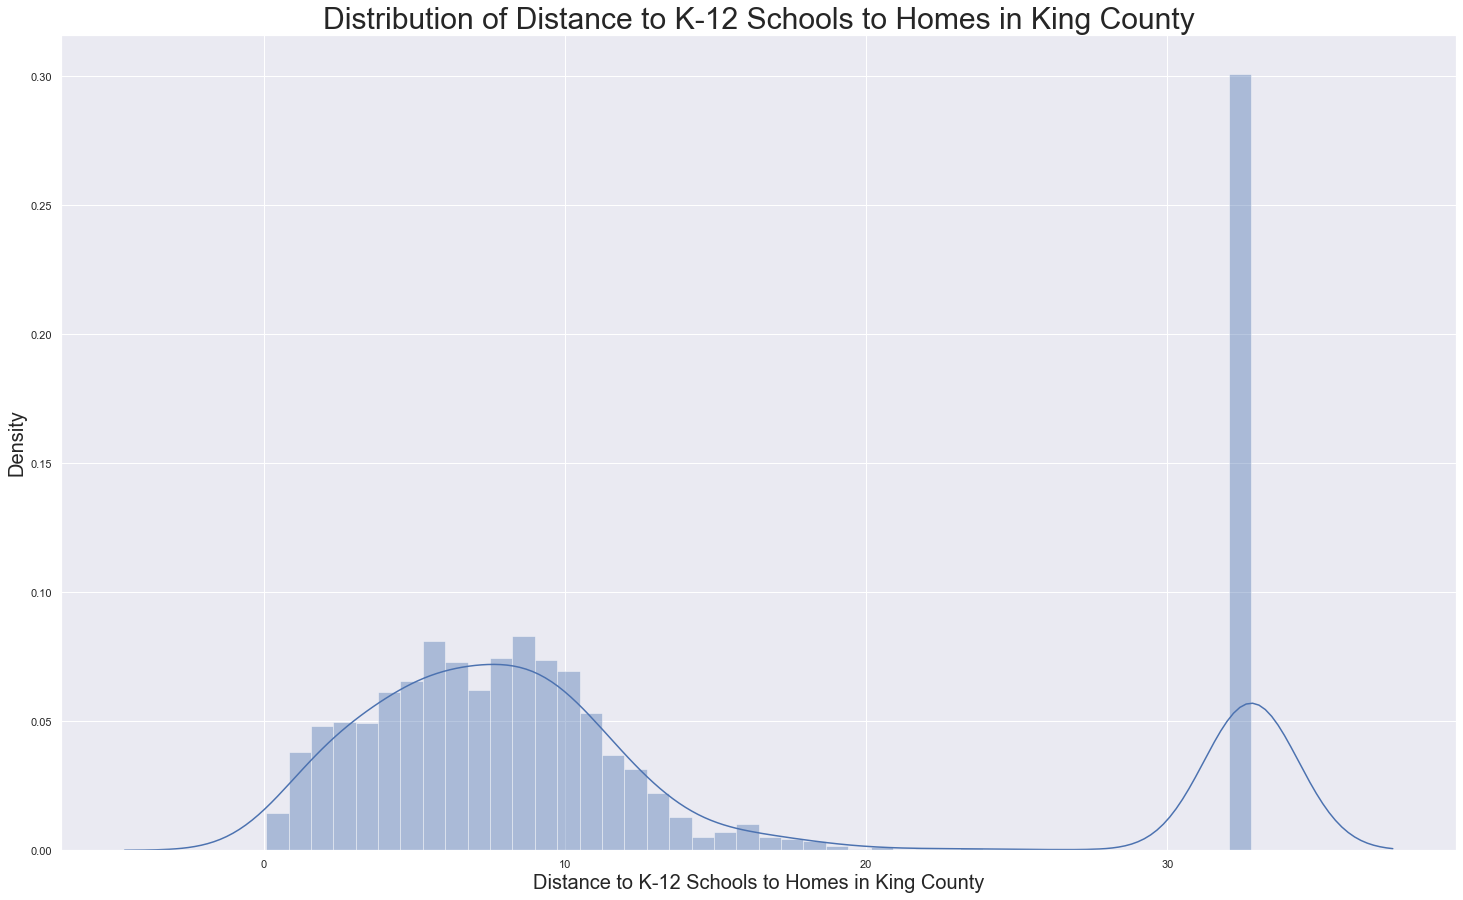

In [18]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_K_12'])
plt.title('Distribution of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.3659161442545636
Kurtosis: 0.28939898895847094


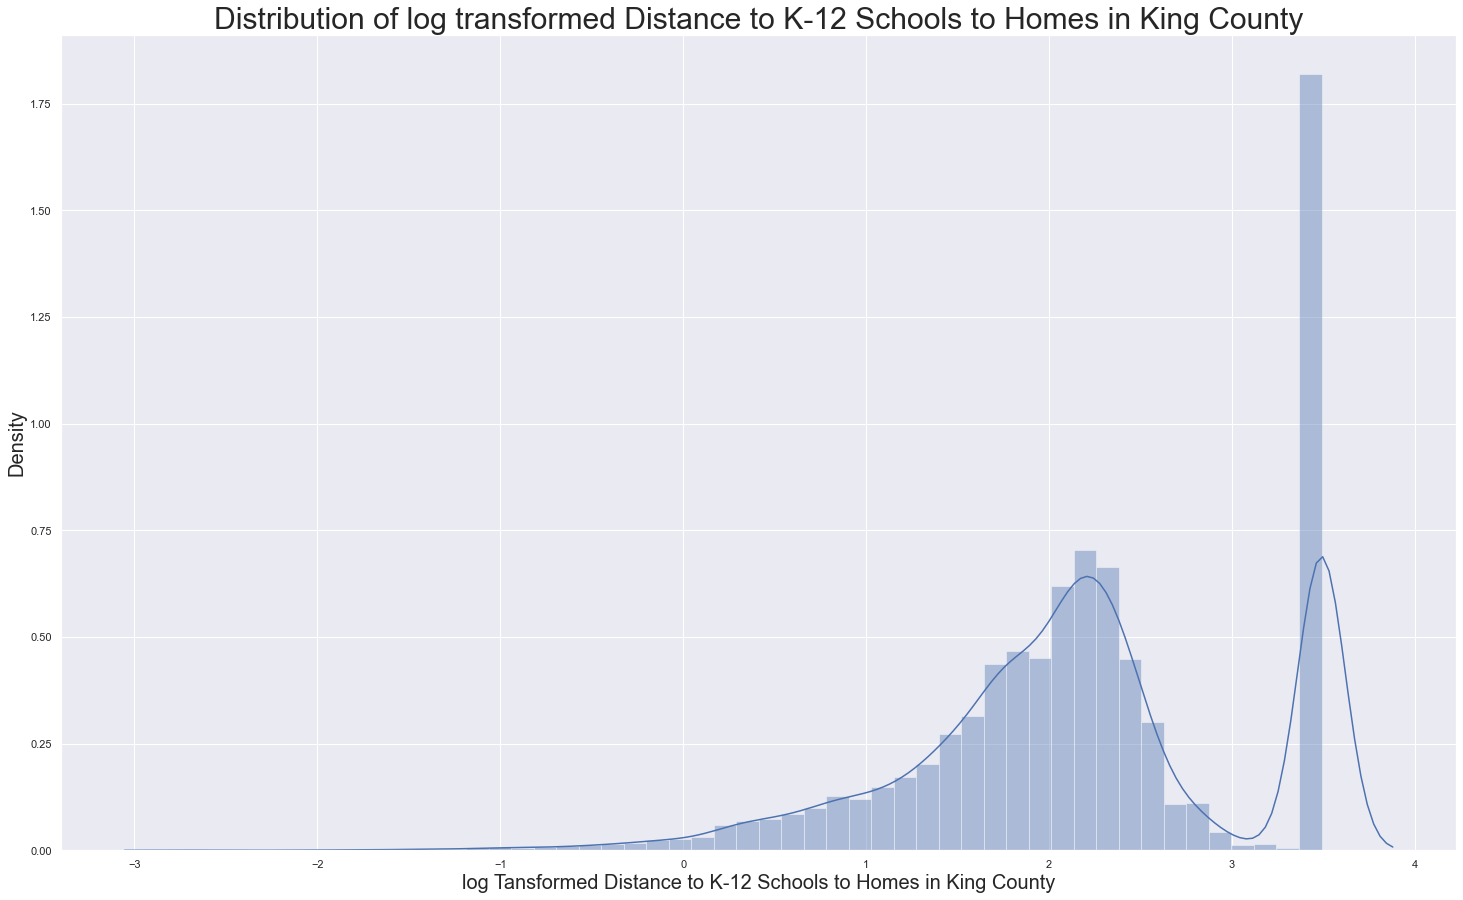

In [19]:
df_norm['log_School_K_12'] = df['School_K_12'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_School_K_12'])
plt.title('Distribution of log transformed Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('log Tansformed Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_School_K_12'].skew())
print('Kurtosis:', df_norm['log_School_K_12'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.2966046461686485
Kurtosis: 3.0225055448180793


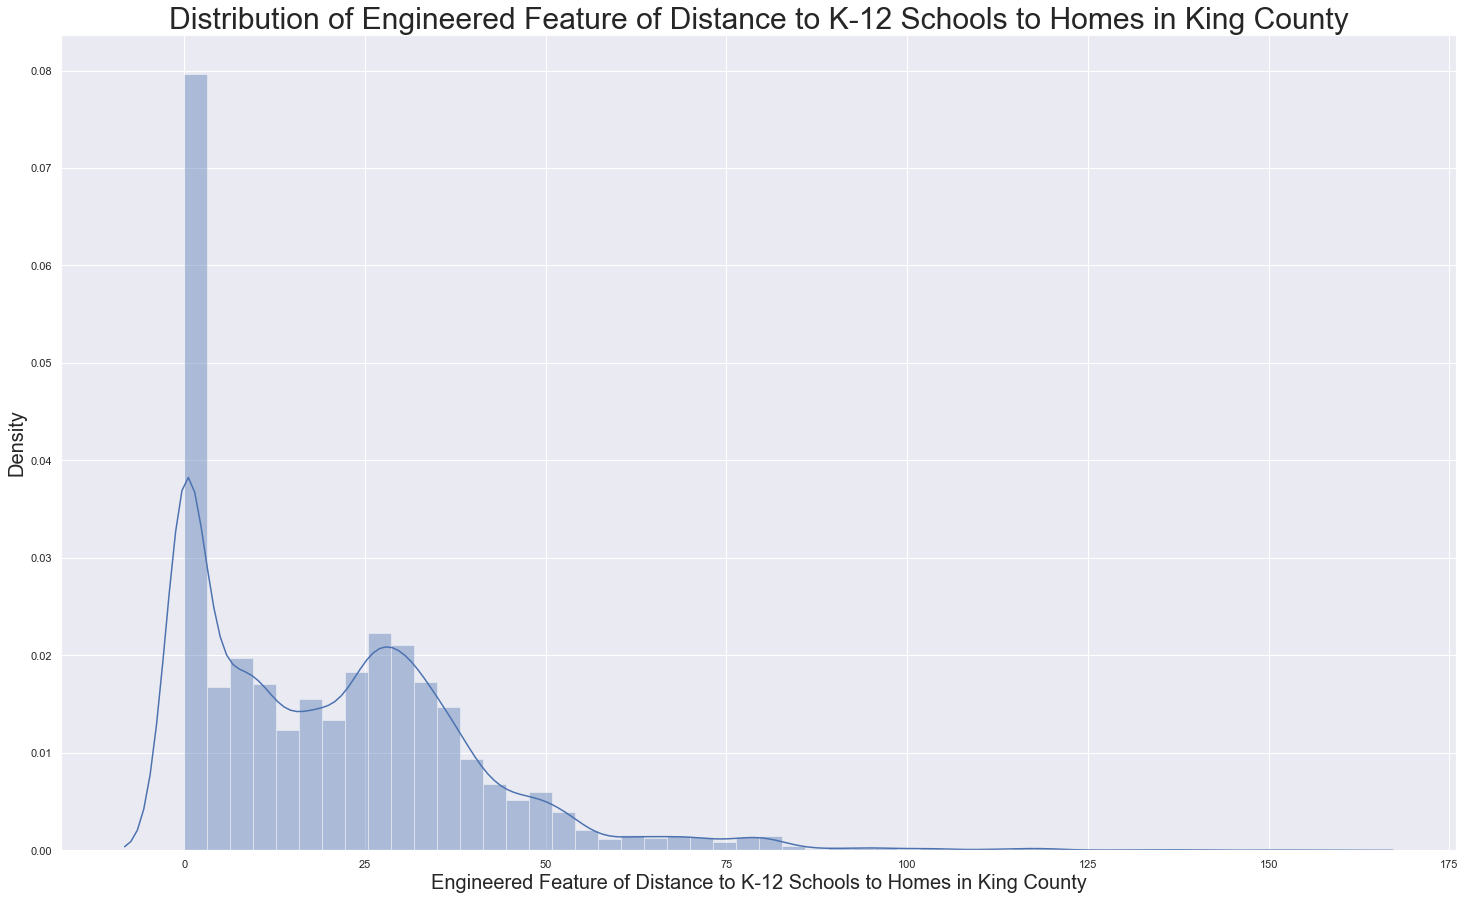

In [20]:
plt.figure(figsize=(25,15))
sns.distplot(df['ef_School_K_12'])
plt.title('Distribution of Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['ef_School_K_12'].skew())
print('Kurtosis:', df['ef_School_K_12'].kurt())

In [21]:
df['ef_School_K_12'].max()

158.93539786047373

In [22]:
# Before transforming the feature distance to K-12 I need to change the values that have zeros in them 
df.loc[df['ef_School_K_12']==0, 'ef_School_K_12']=(df['ef_School_K_12'].max()+1)
# I will replace these values with values that are close to the max. I will assume that values that are futhest from a school is
# comparable to the ones that have no near by school

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.0916650893015605
Kurtosis: -0.5462826679777408


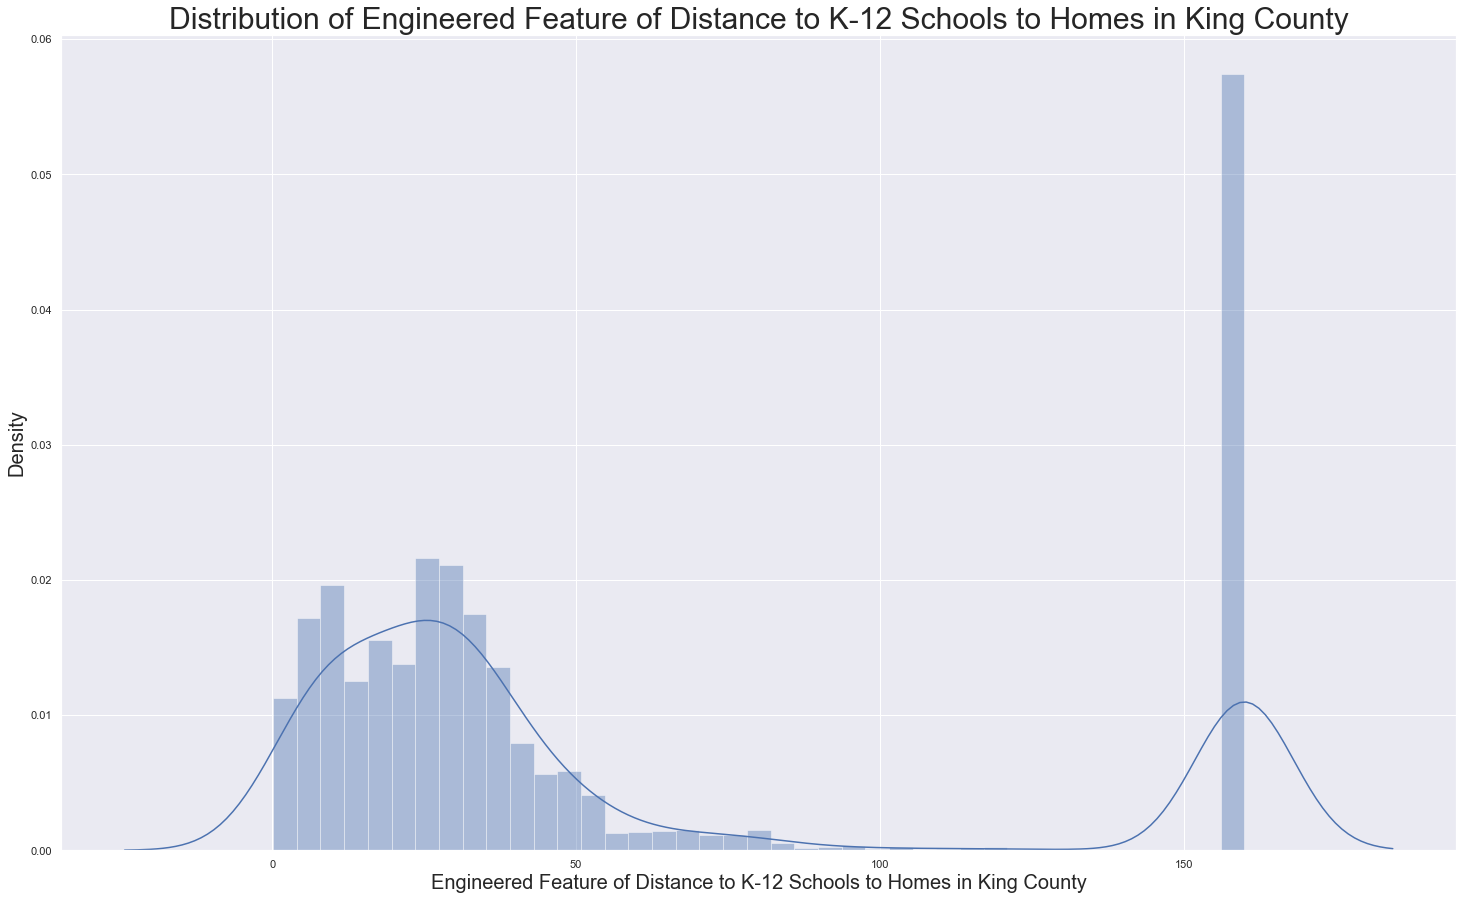

In [23]:
plt.figure(figsize=(25,15))
sns.distplot(df['ef_School_K_12'])
plt.title('Distribution of Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['ef_School_K_12'].skew())
print('Kurtosis:', df['ef_School_K_12'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.2626263910224313
Kurtosis: -0.16465234174344356


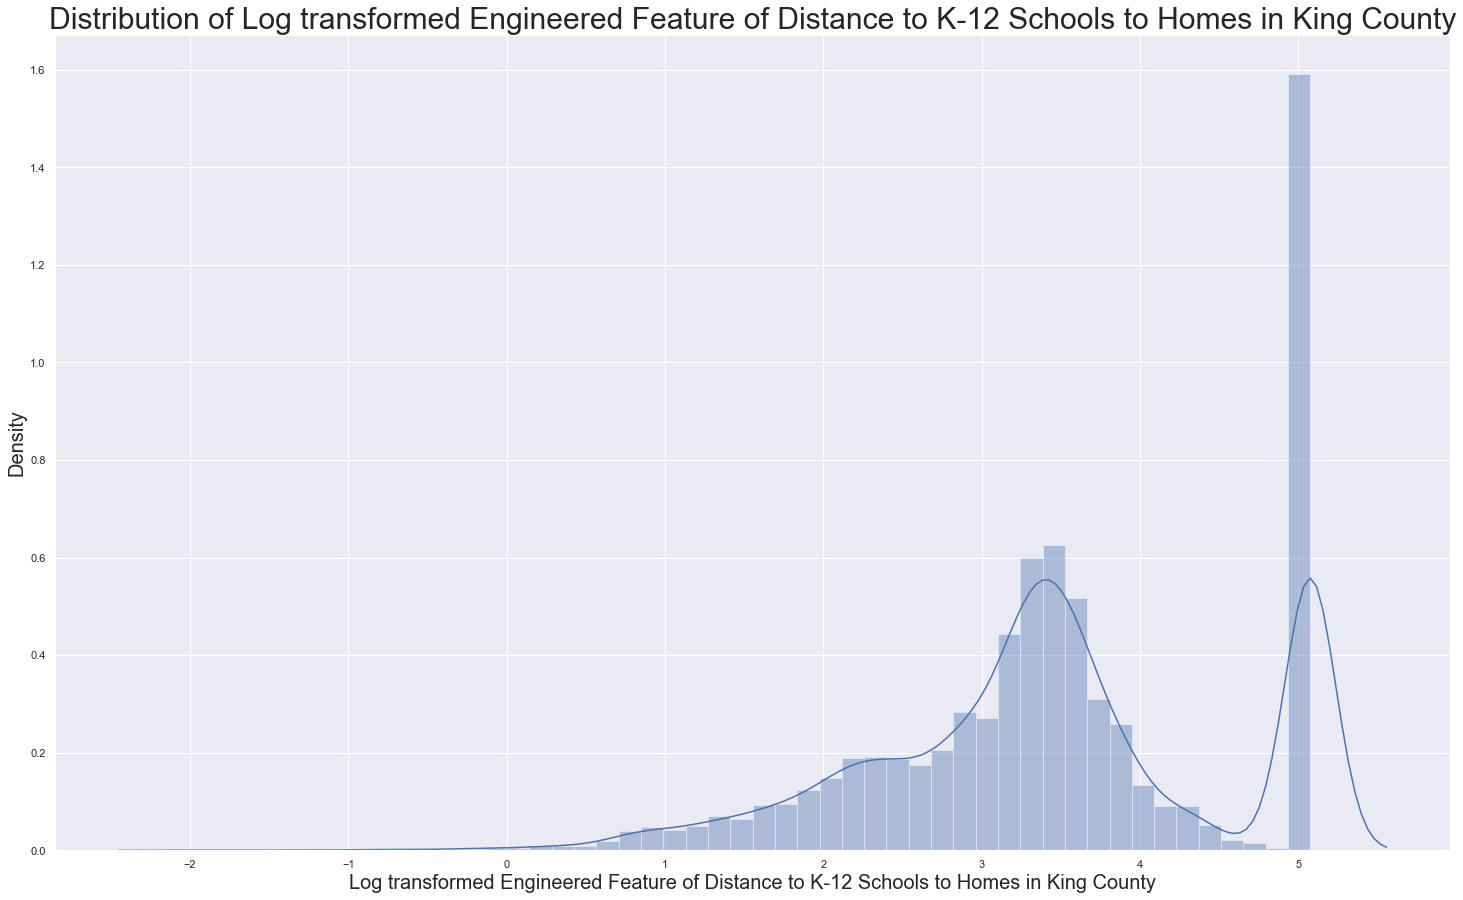

In [24]:
df_norm['ef_School_K_12_log'] = df['ef_School_K_12'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['ef_School_K_12_log'])
plt.title('Distribution of Log transformed Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['ef_School_K_12_log'].skew())
print('Kurtosis:', df_norm['ef_School_K_12_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 4.370880078671187
Kurtosis: 48.394776548513704


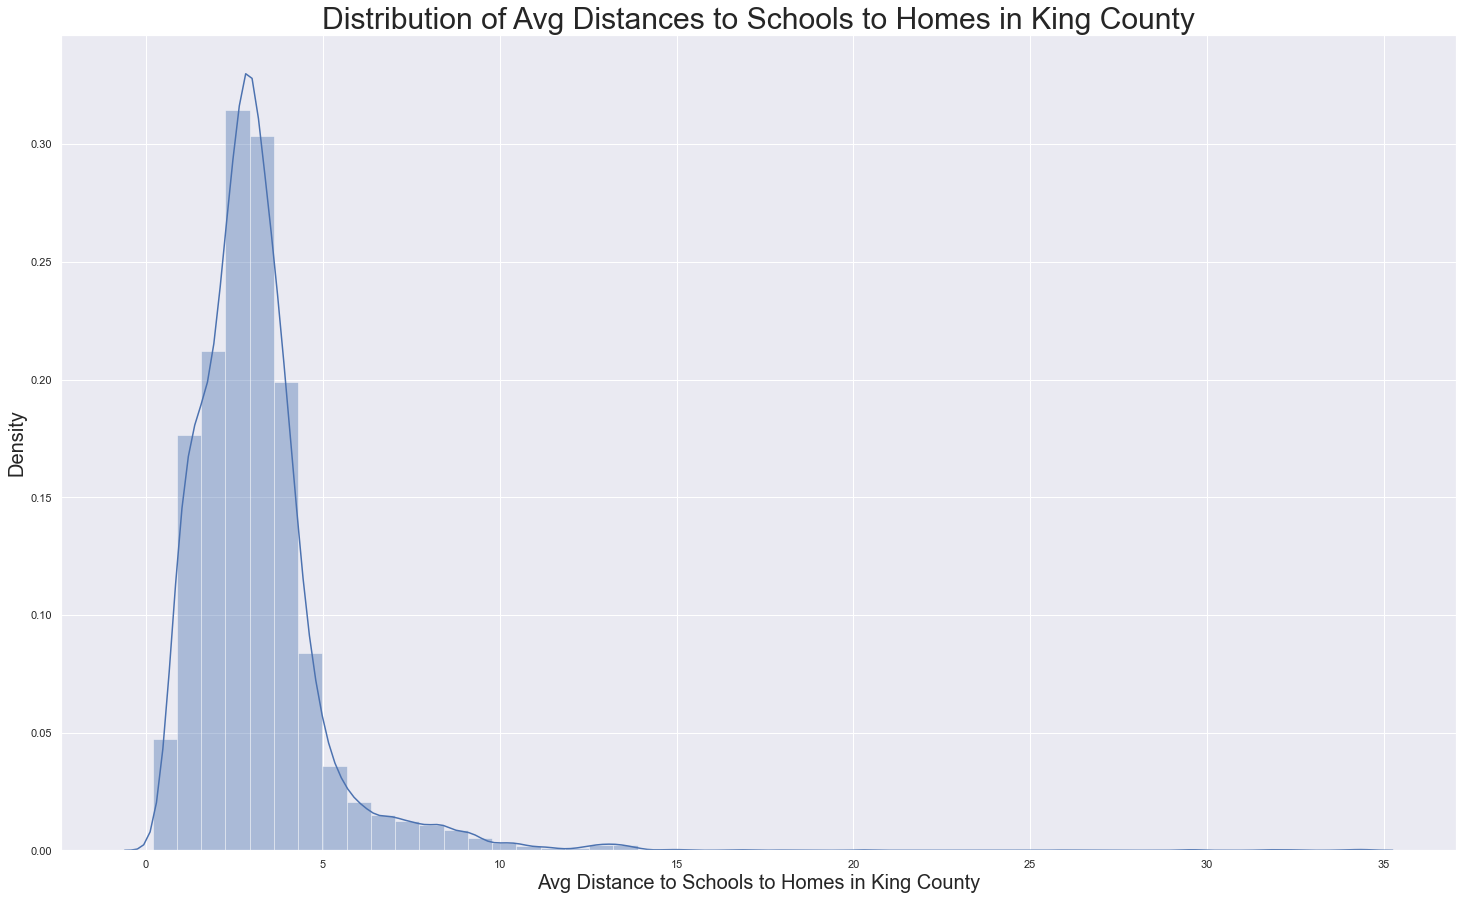

In [25]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_dist_avg'])
plt.title('Distribution of Avg Distances to Schools to Homes in King County', fontsize=30)
plt.xlabel('Avg Distance to Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_dist_avg'].skew())
print('Kurtosis:', df['School_dist_avg'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.37097581495108406
Kurtosis: 1.1768127977089184


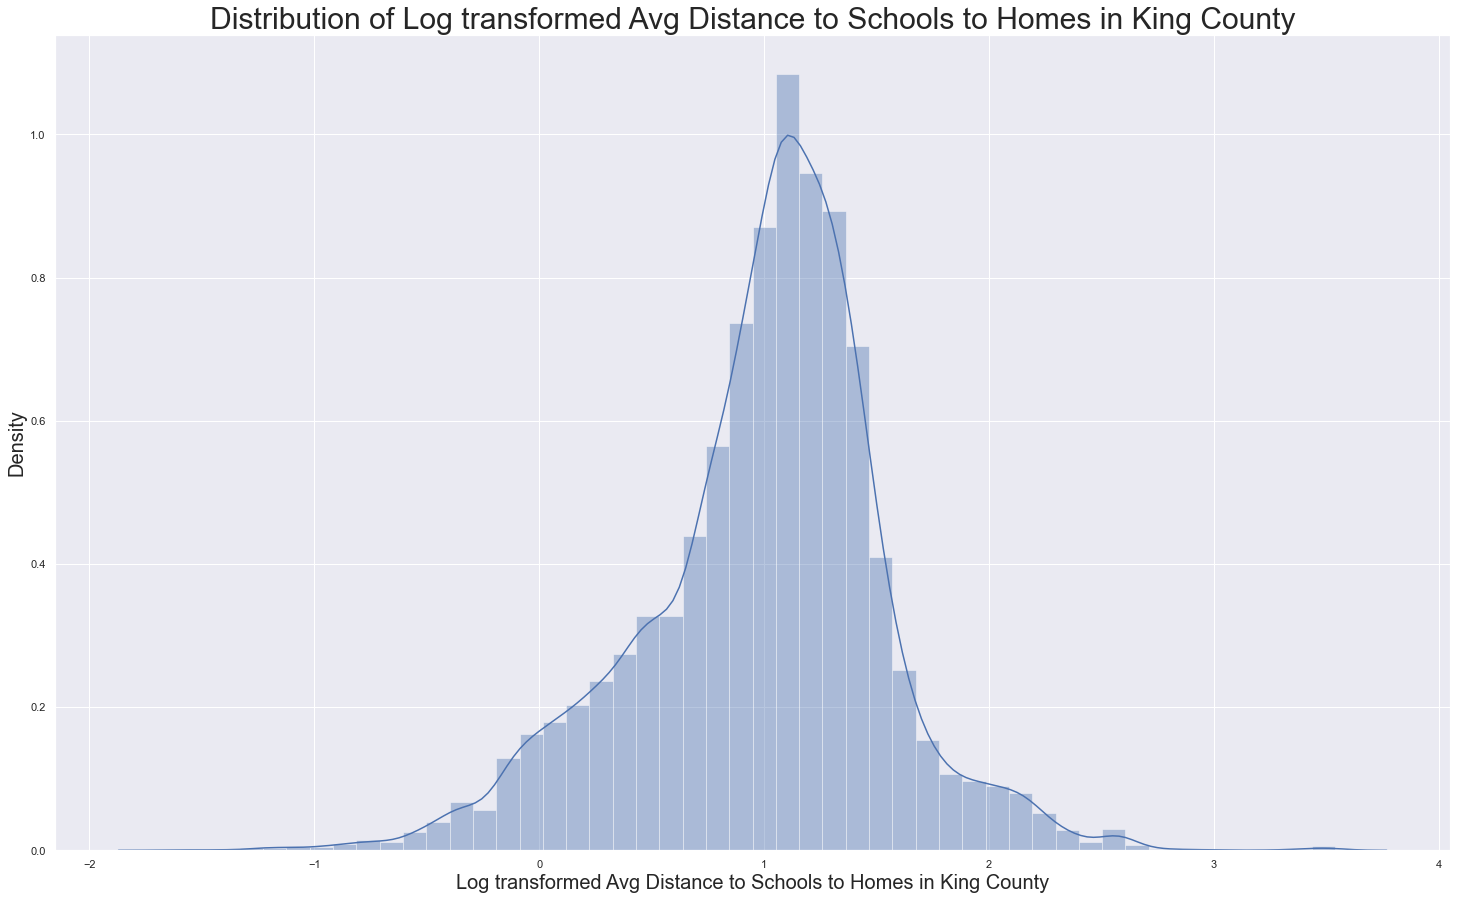

In [26]:
df_norm['School_dist_avg_log'] = df['School_dist_avg'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['School_dist_avg_log'])
plt.title('Distribution of Log transformed Avg Distance to Schools to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Avg Distance to Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['School_dist_avg_log'].skew())
print('Kurtosis:', df_norm['School_dist_avg_log'].kurt())

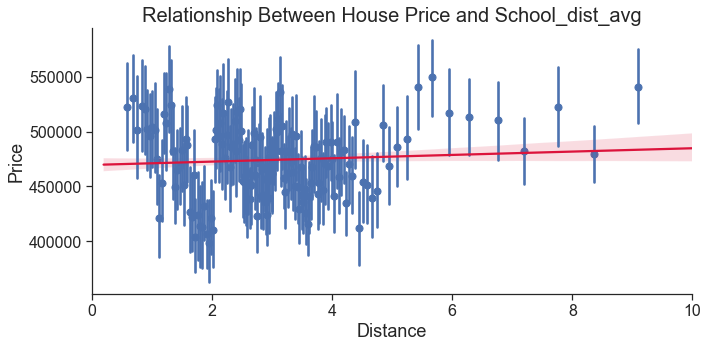

In [27]:
sns.set_style('ticks')
sns.lmplot(x='School_dist_avg', y='price', data=df, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and School_dist_avg', fontsize=20)
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.xlim(0, 10);
plt.tight_layout()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.4092842560909506
Kurtosis: 30.7727373939913


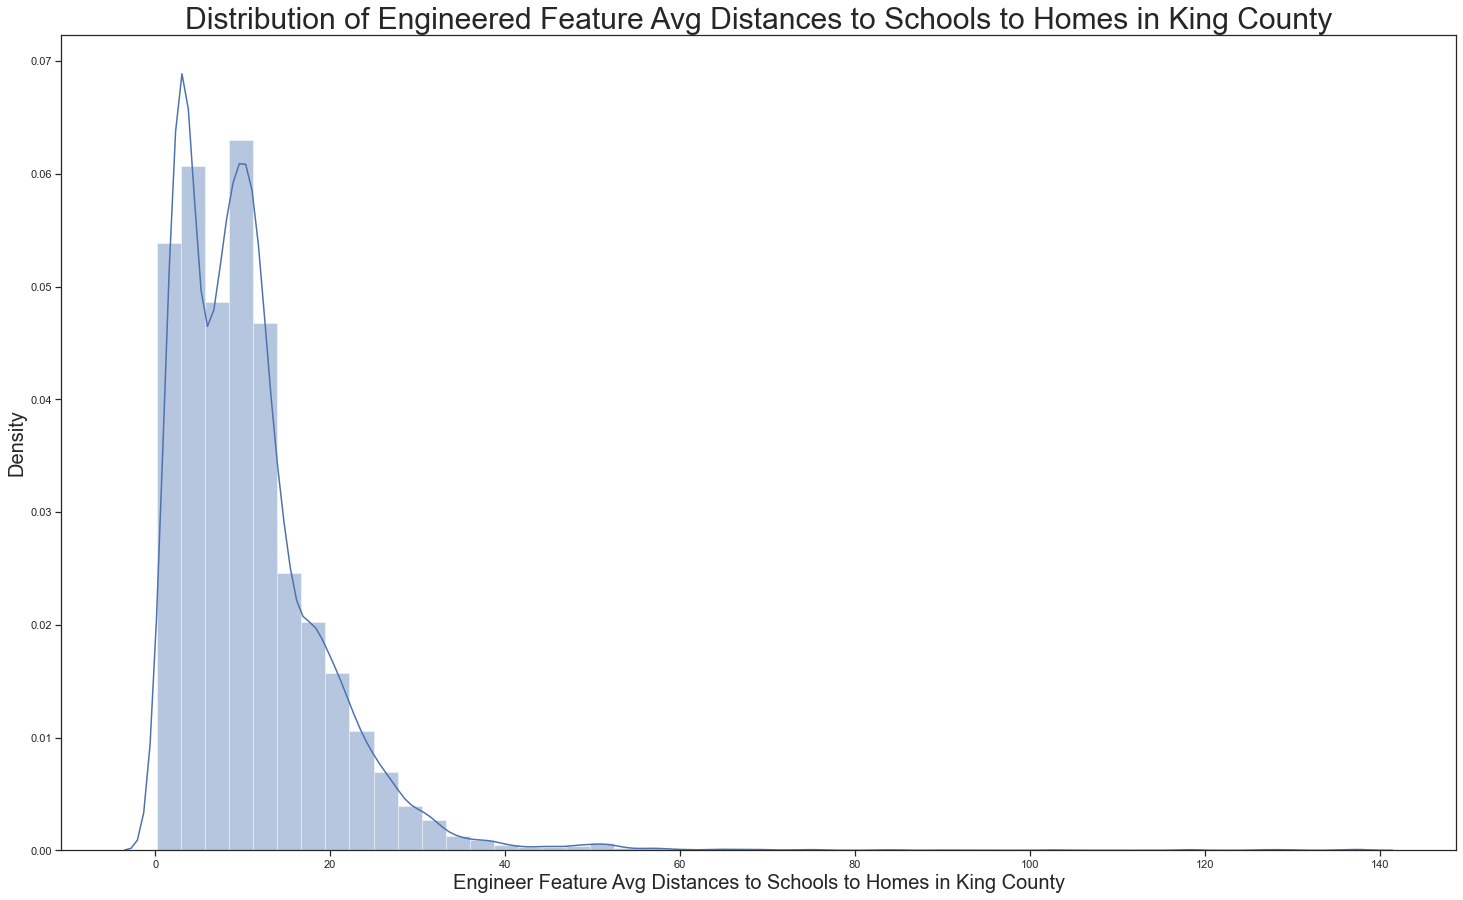

In [28]:
plt.figure(figsize=(25,15))
sns.distplot(df['ef_School_dist_avg'])
plt.title('Distribution of Engineered Feature Avg Distances to Schools to Homes in King County', fontsize=30)
plt.xlabel('Engineer Feature Avg Distances to Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['ef_School_dist_avg'].skew())
print('Kurtosis:', df['ef_School_dist_avg'].kurt())

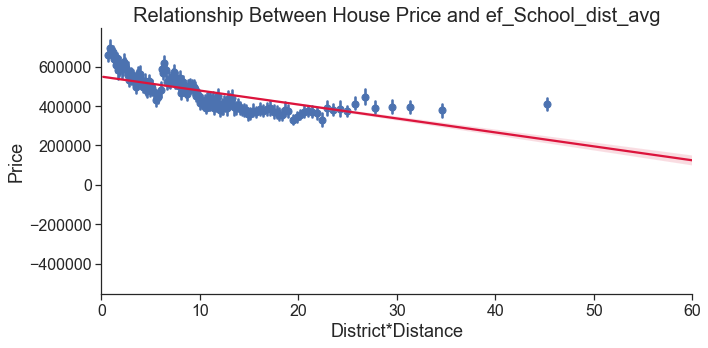

In [29]:
sns.set_style('ticks')
sns.lmplot(x='ef_School_dist_avg', y='price', data=df, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and ef_School_dist_avg', fontsize=20)
plt.xlabel('District*Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.xlim(0, 60);
plt.tight_layout()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.5893317856436723
Kurtosis: 0.15820140964584262


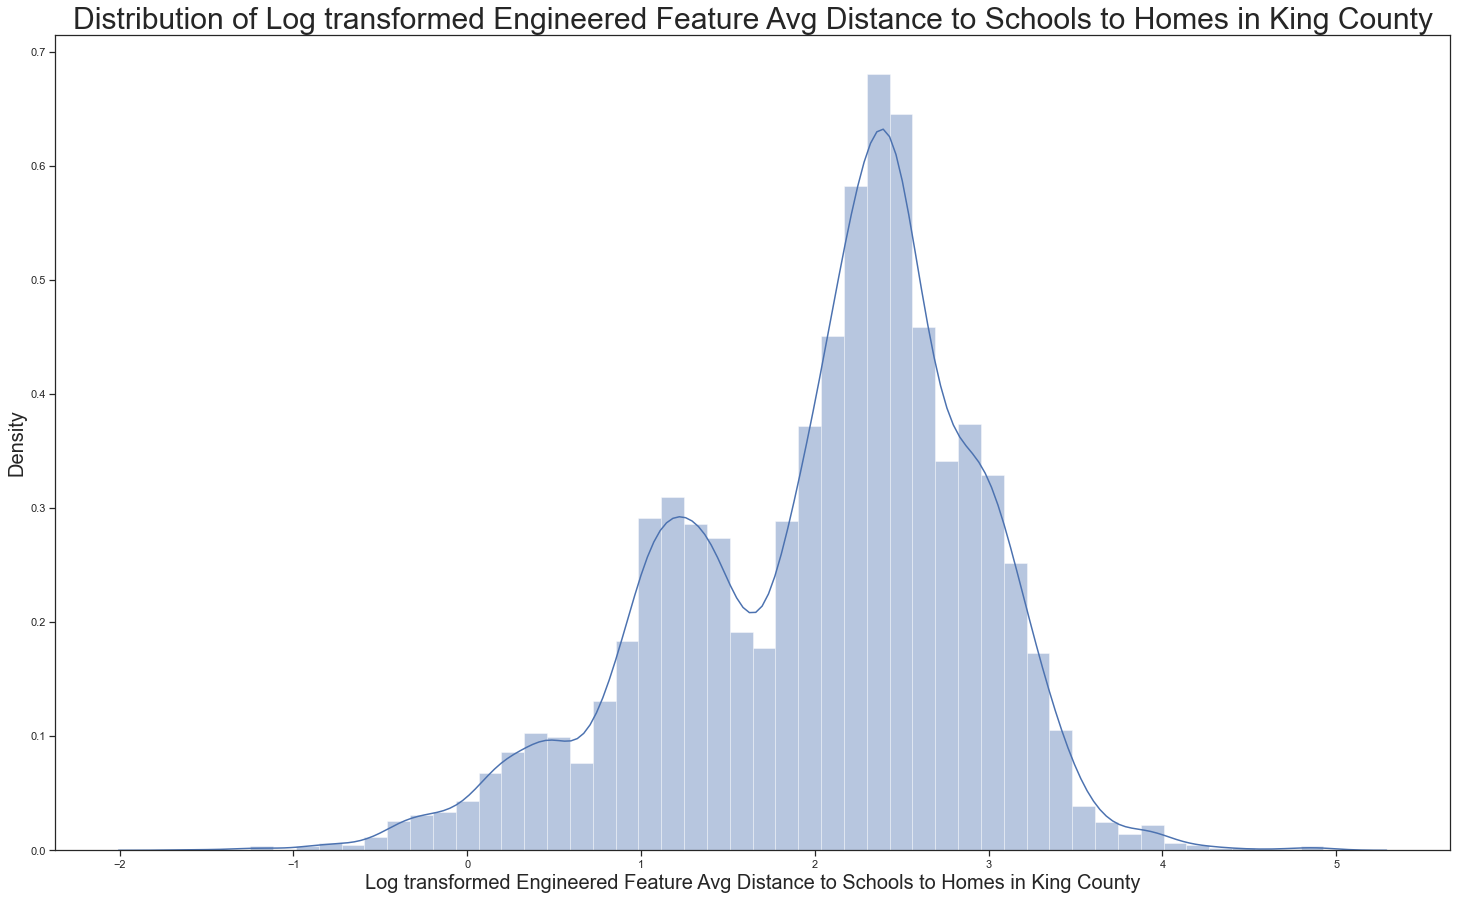

In [30]:
df_norm['ef_School_dist_avg_log'] = df['ef_School_dist_avg'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['ef_School_dist_avg_log'])
plt.title('Distribution of Log transformed Engineered Feature Avg Distance to Schools to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Engineered Feature Avg Distance to Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['ef_School_dist_avg_log'].skew())
print('Kurtosis:', df_norm['ef_School_dist_avg_log'].kurt())

## Distribution Transformation of Point of Interest

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.689957848305648
Kurtosis: 8.70474390080699


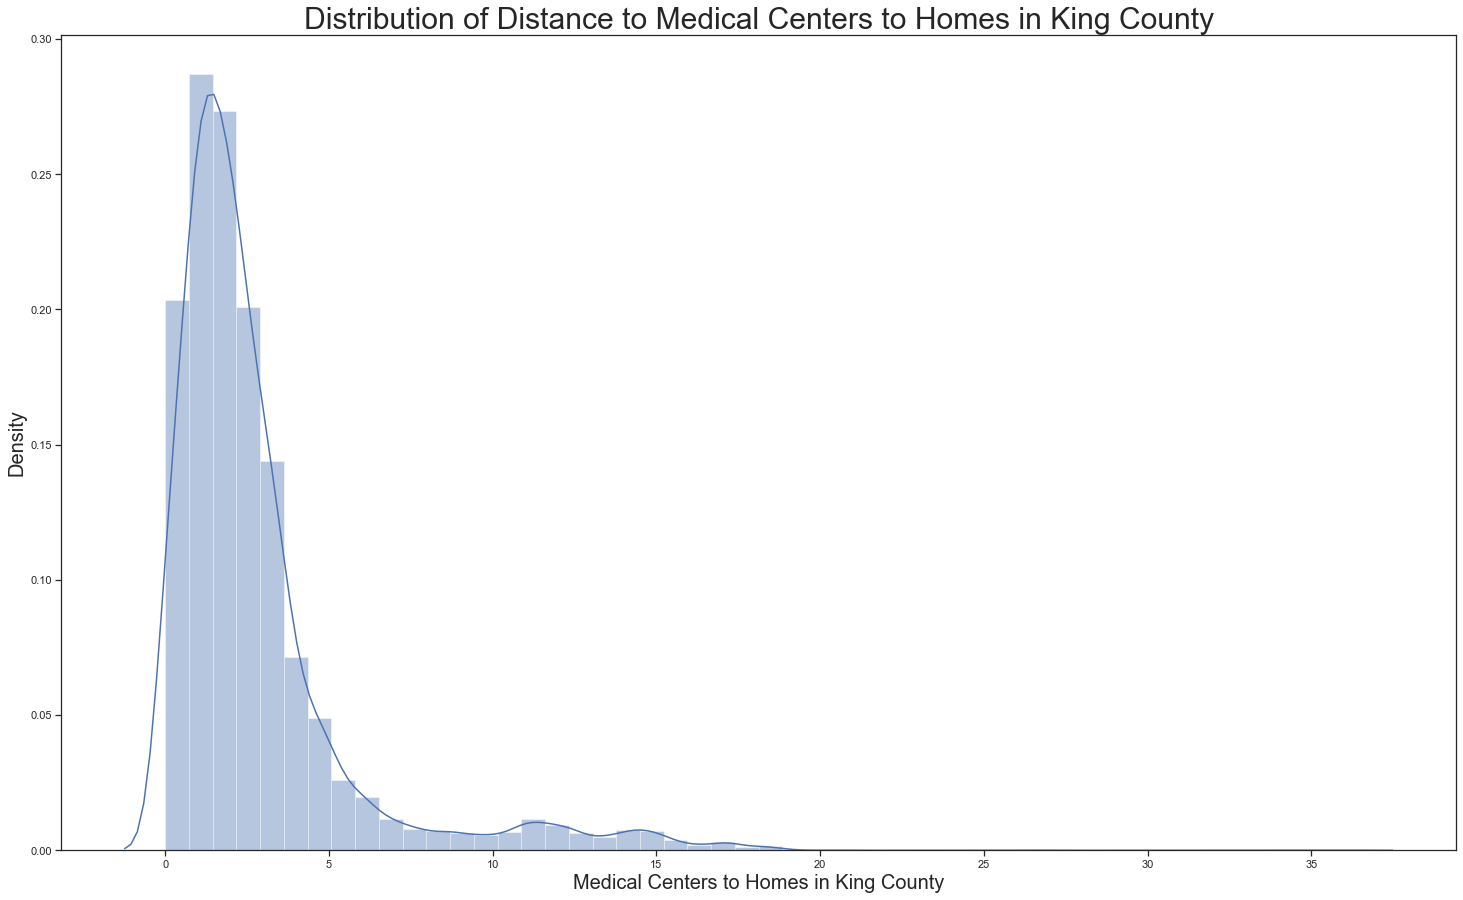

In [31]:
plt.figure(figsize=(25,15))
sns.distplot(df['medical_dist'])
plt.title('Distribution of Distance to Medical Centers to Homes in King County', fontsize=30)
plt.xlabel('Medical Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['medical_dist'].skew())
print('Kurtosis:', df['medical_dist'].kurt())

In [32]:
df['medical_dist'].mean()

2.758561273454841

In [33]:
# Before transforming the feature distance to medical center I need to change the values that have zeros in them 
df.loc[df['medical_dist']==0, 'medical_dist']=df['medical_dist'].mean()
# I will replace these values with values that are the mean.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.788859976380863
Kurtosis: 9.278985720716541


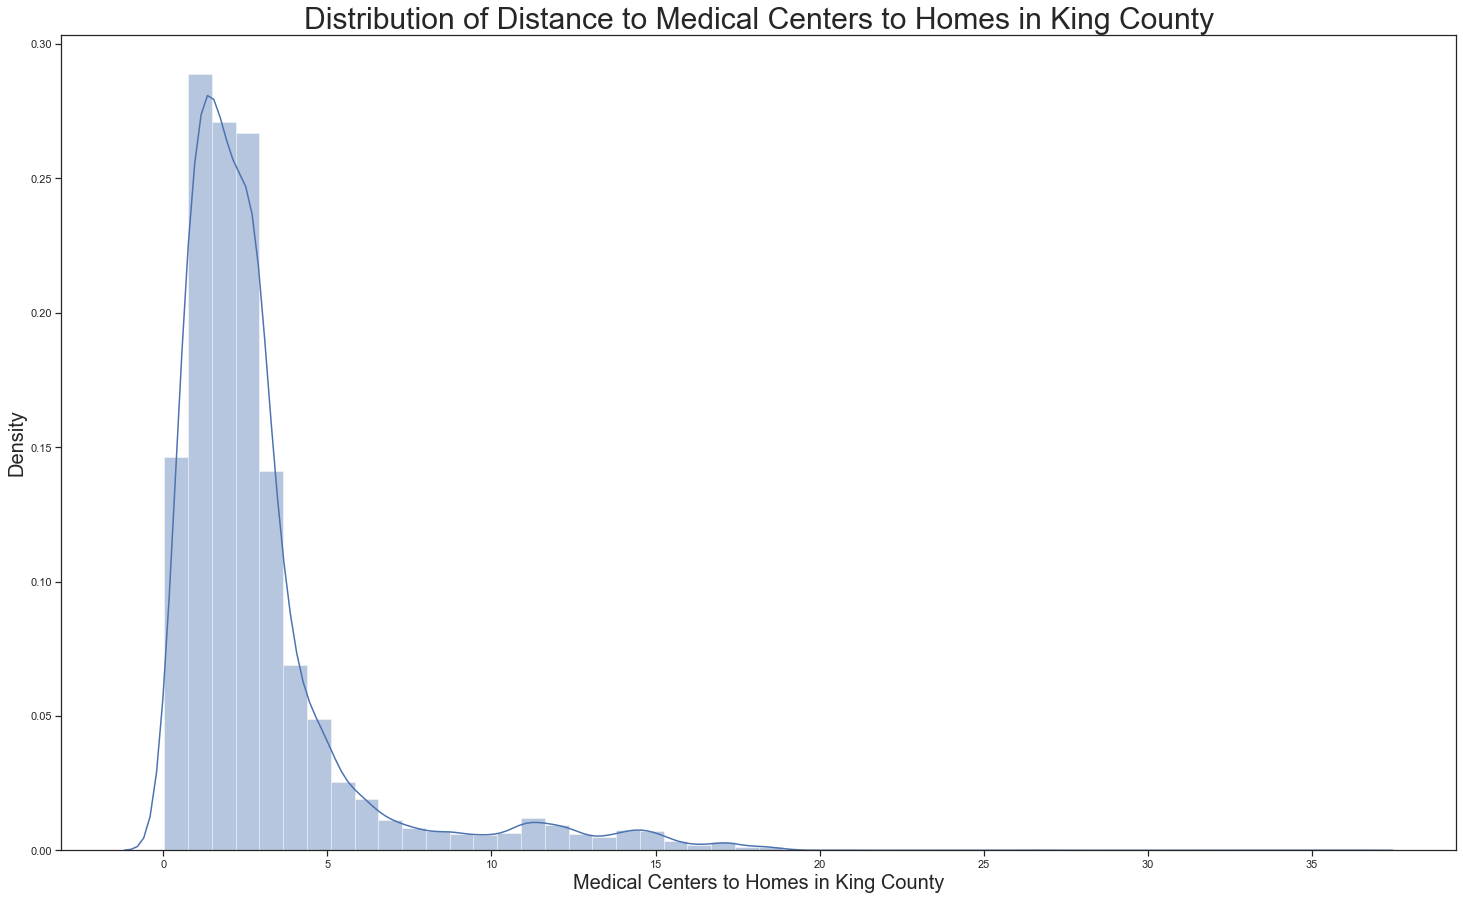

In [34]:
plt.figure(figsize=(25,15))
sns.distplot(df['medical_dist'])
plt.title('Distribution of Distance to Medical Centers to Homes in King County', fontsize=30)
plt.xlabel('Medical Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['medical_dist'].skew())
print('Kurtosis:', df['medical_dist'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.12382615464295961
Kurtosis: 0.7726088486361511


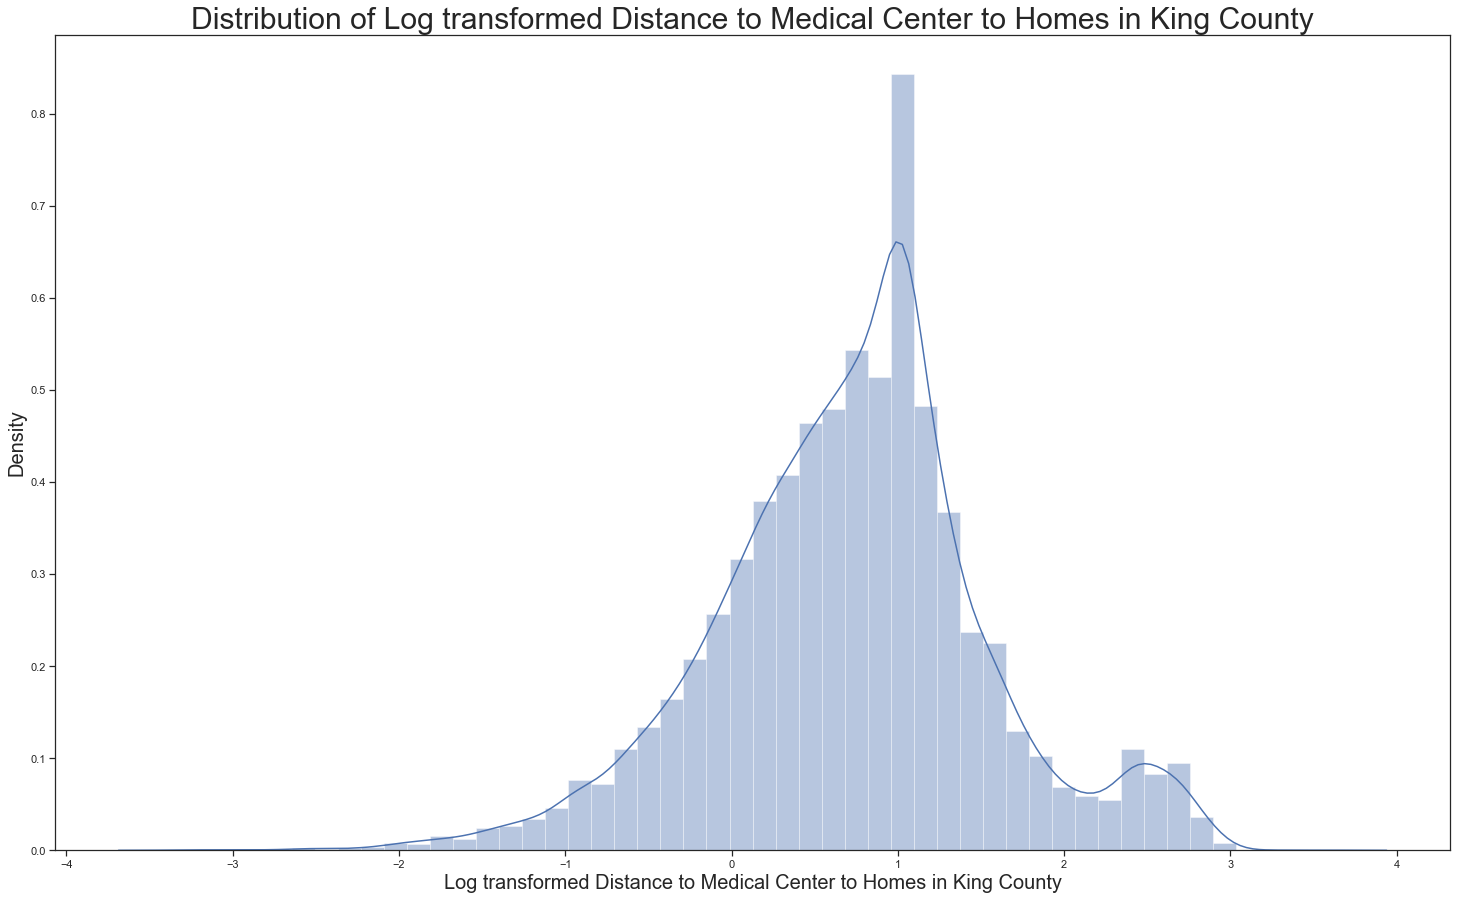

In [35]:
df_norm['medical_dist_log'] = df['medical_dist'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['medical_dist_log'])
plt.title('Distribution of Log transformed Distance to Medical Center to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Distance to Medical Center to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['medical_dist_log'].skew())
print('Kurtosis:', df_norm['medical_dist_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.8889053890116004
Kurtosis: 0.5737118245530337


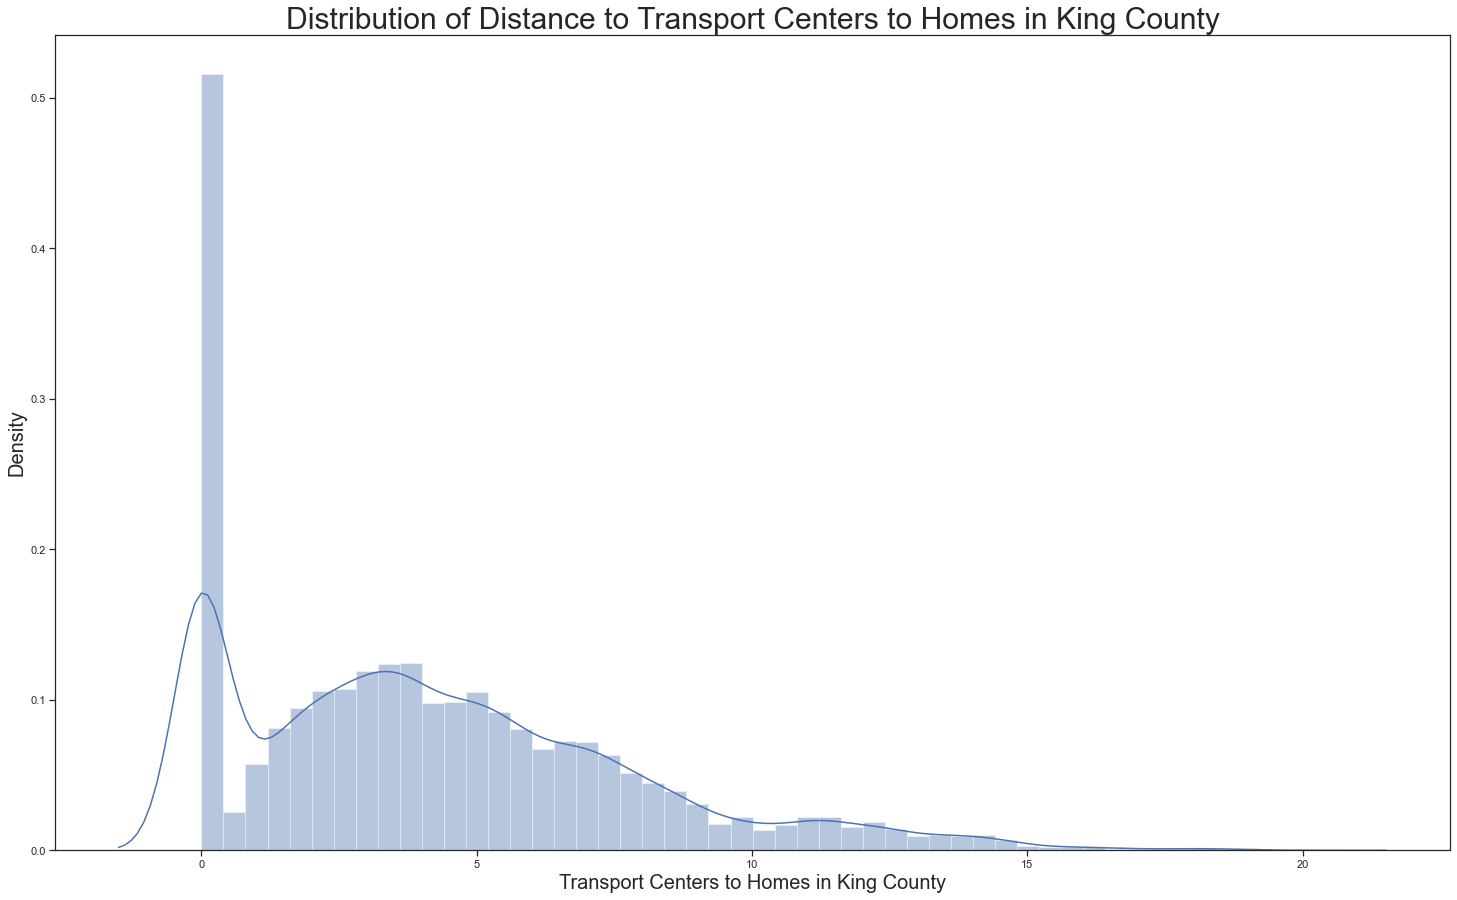

In [36]:
plt.figure(figsize=(25,15))
sns.distplot(df['transport_dist'])
plt.title('Distribution of Distance to Transport Centers to Homes in King County', fontsize=30)
plt.xlabel('Transport Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['transport_dist'].skew())
print('Kurtosis:', df['transport_dist'].kurt())

In [37]:
df['transport_dist'].max()

20.022081414794023

In [38]:
# Before transforming the feature distance to medical center I need to change the values that have zeros in them 
df.loc[df['transport_dist']==0, 'transport_dist']=df['transport_dist'].max()
# I will replace these values with values that are the mean.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.9080666538322124
Kurtosis: -0.6945002664909015


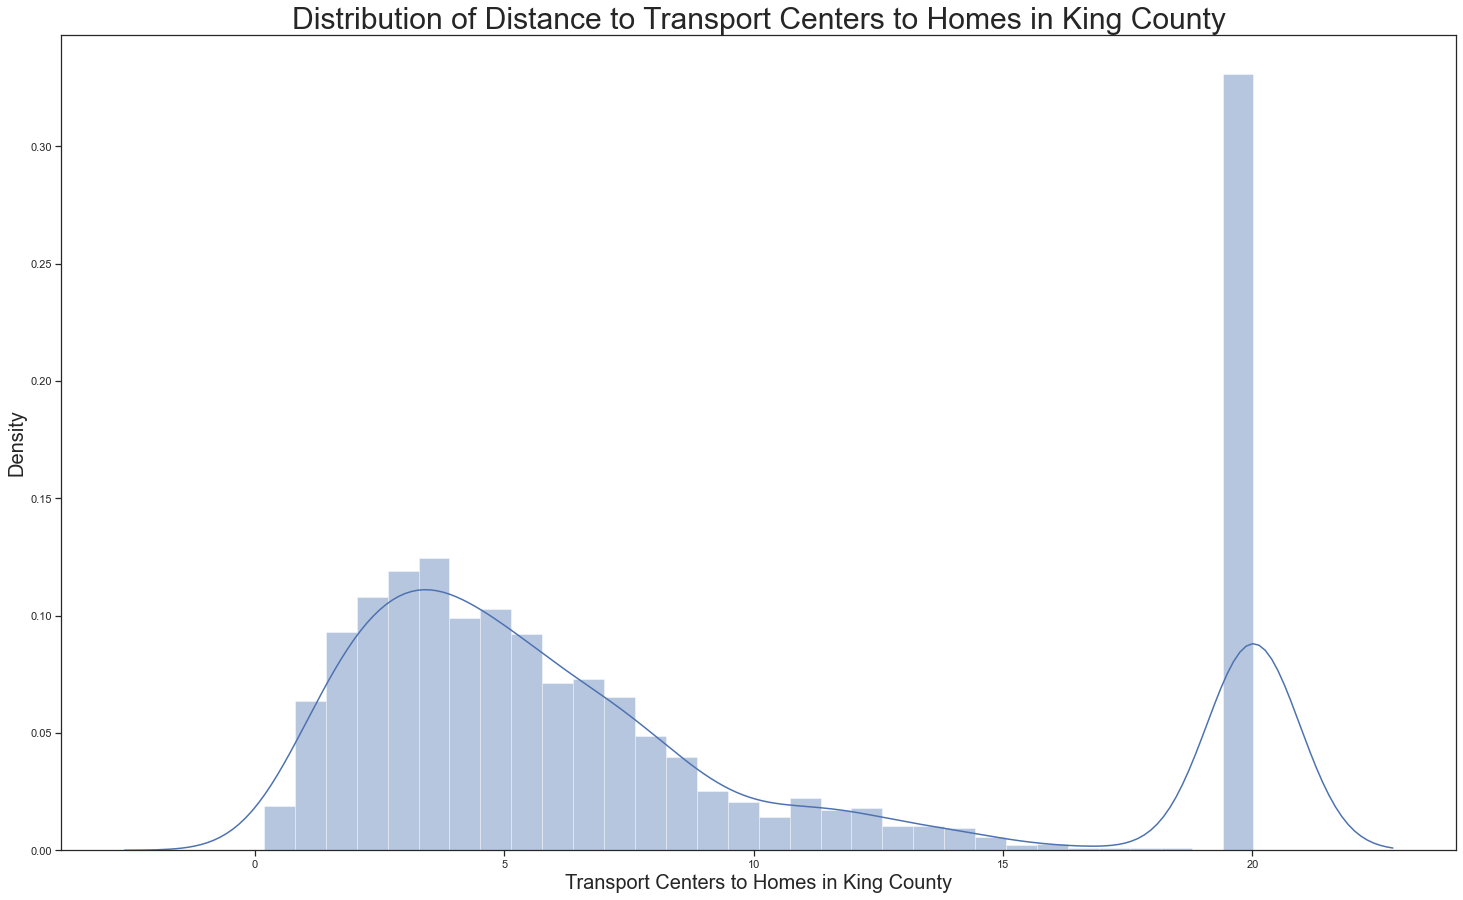

In [39]:
plt.figure(figsize=(25,15))
sns.distplot(df['transport_dist'])
plt.title('Distribution of Distance to Transport Centers to Homes in King County', fontsize=30)
plt.xlabel('Transport Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['transport_dist'].skew())
print('Kurtosis:', df['transport_dist'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.195868324145141
Kurtosis: -0.4883552055466387


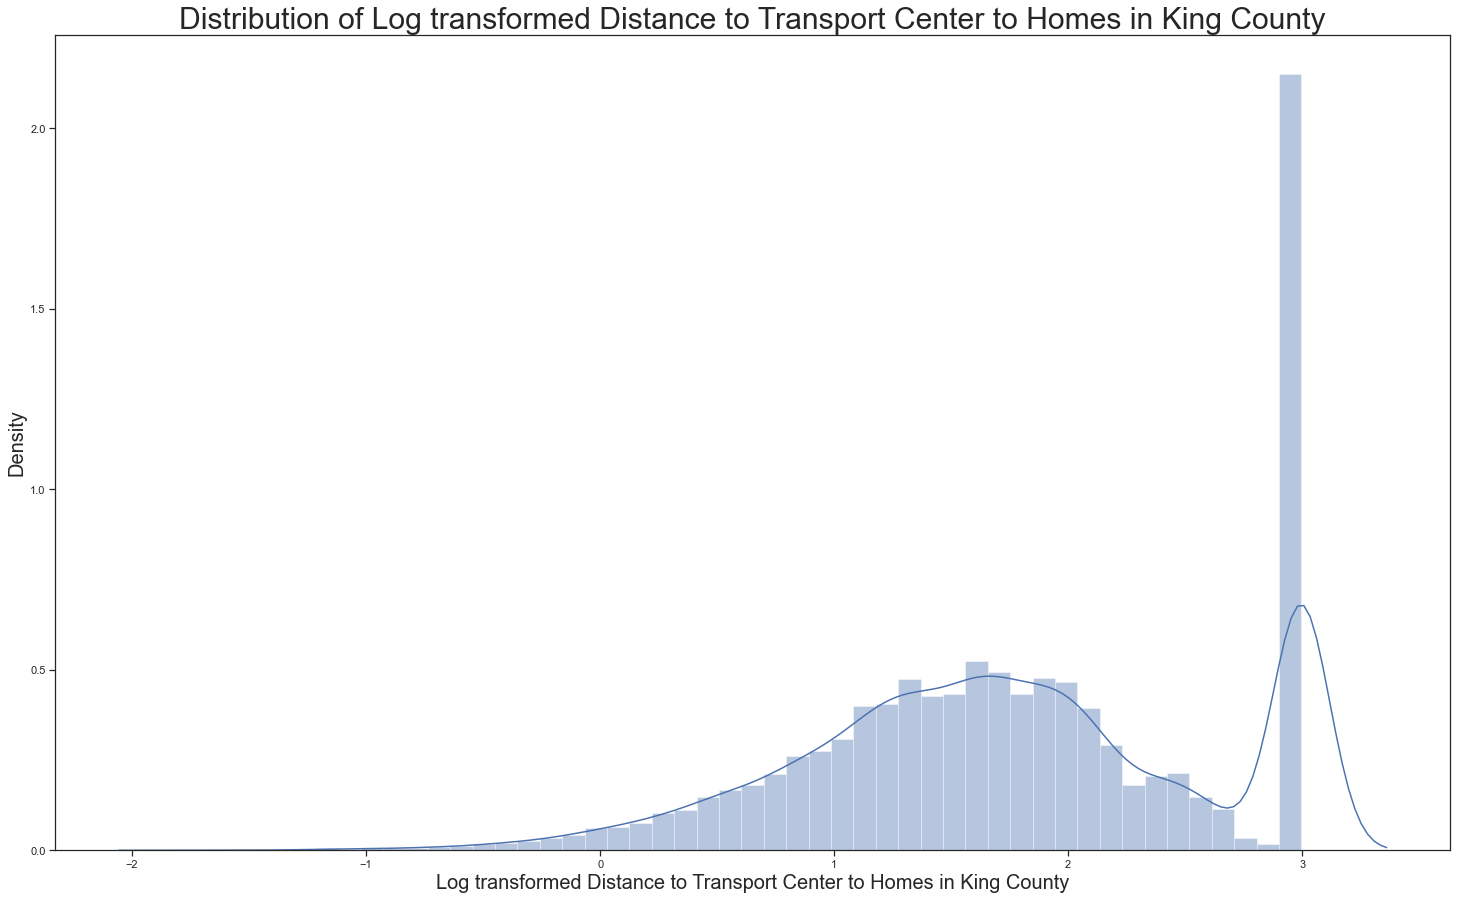

In [40]:
df_norm['transport_dist_log'] = df['transport_dist'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['transport_dist_log'])
plt.title('Distribution of Log transformed Distance to Transport Center to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Distance to Transport Center to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['transport_dist_log'].skew())
print('Kurtosis:', df_norm['transport_dist_log'].kurt())

## Distribution Transfromation Crime, Violent and Total Crime Per Capita

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.231012702588811
Kurtosis: 12.308893184803113


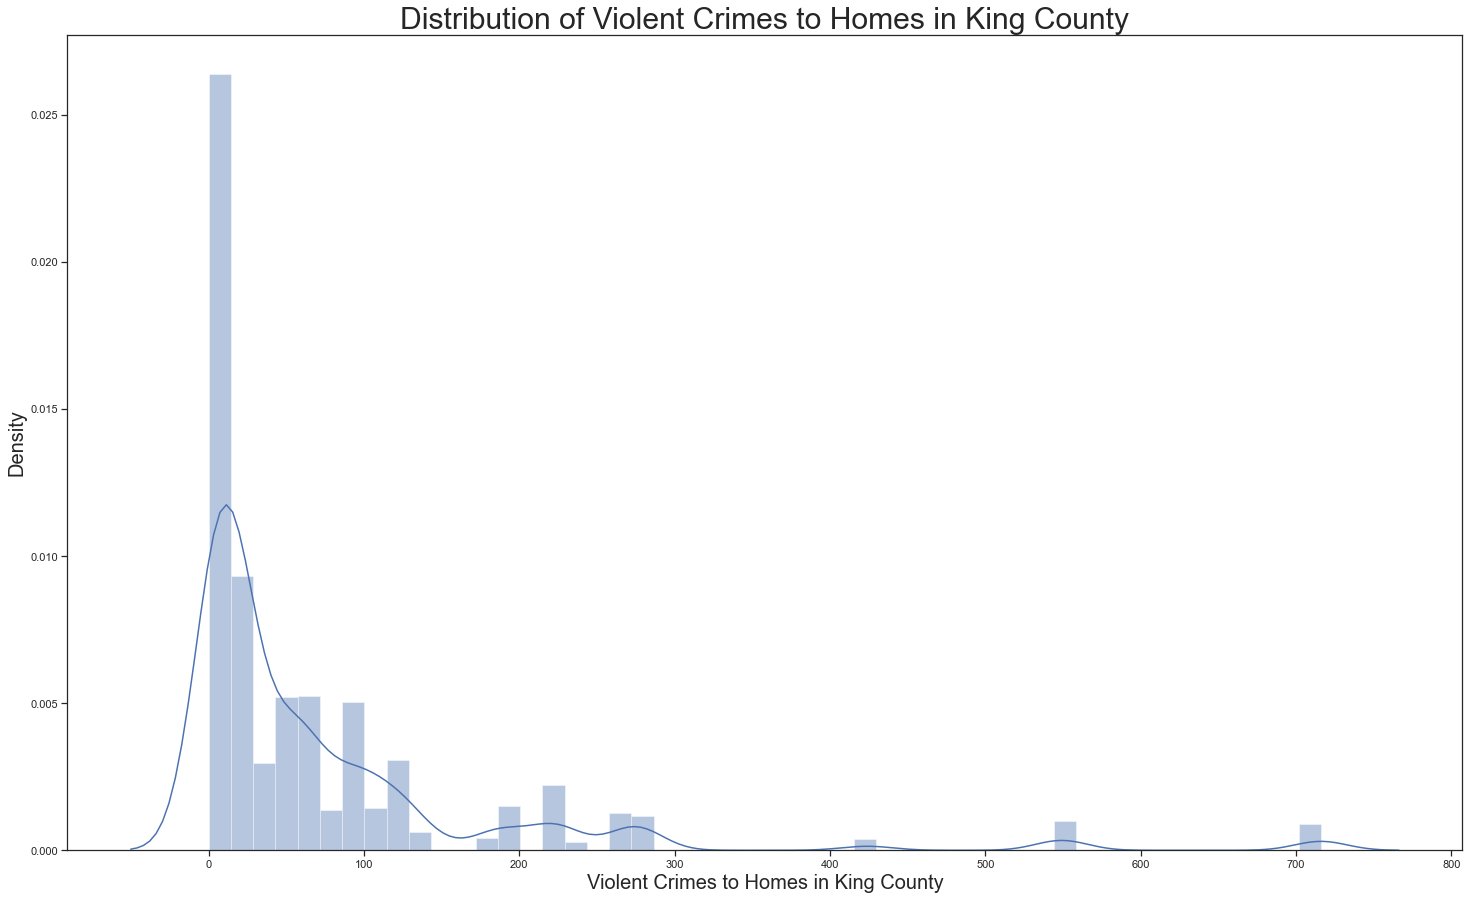

In [41]:
plt.figure(figsize=(25,15))
sns.distplot(df['viol_crime'])
plt.title('Distribution of Violent Crimes to Homes in King County', fontsize=30)
plt.xlabel('Violent Crimes to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['viol_crime'].skew())
print('Kurtosis:', df['viol_crime'].kurt())

In [42]:
df['viol_crime'].min()

0.0

In [43]:
# Before transforming the feature of violent crimes per capita I need to change the values that have zeros in them 
df.loc[df['viol_crime']==0, 'viol_crime']=0.01
# I will replace these values with 0.01.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.798523634654354
Kurtosis: 4.461616021951151


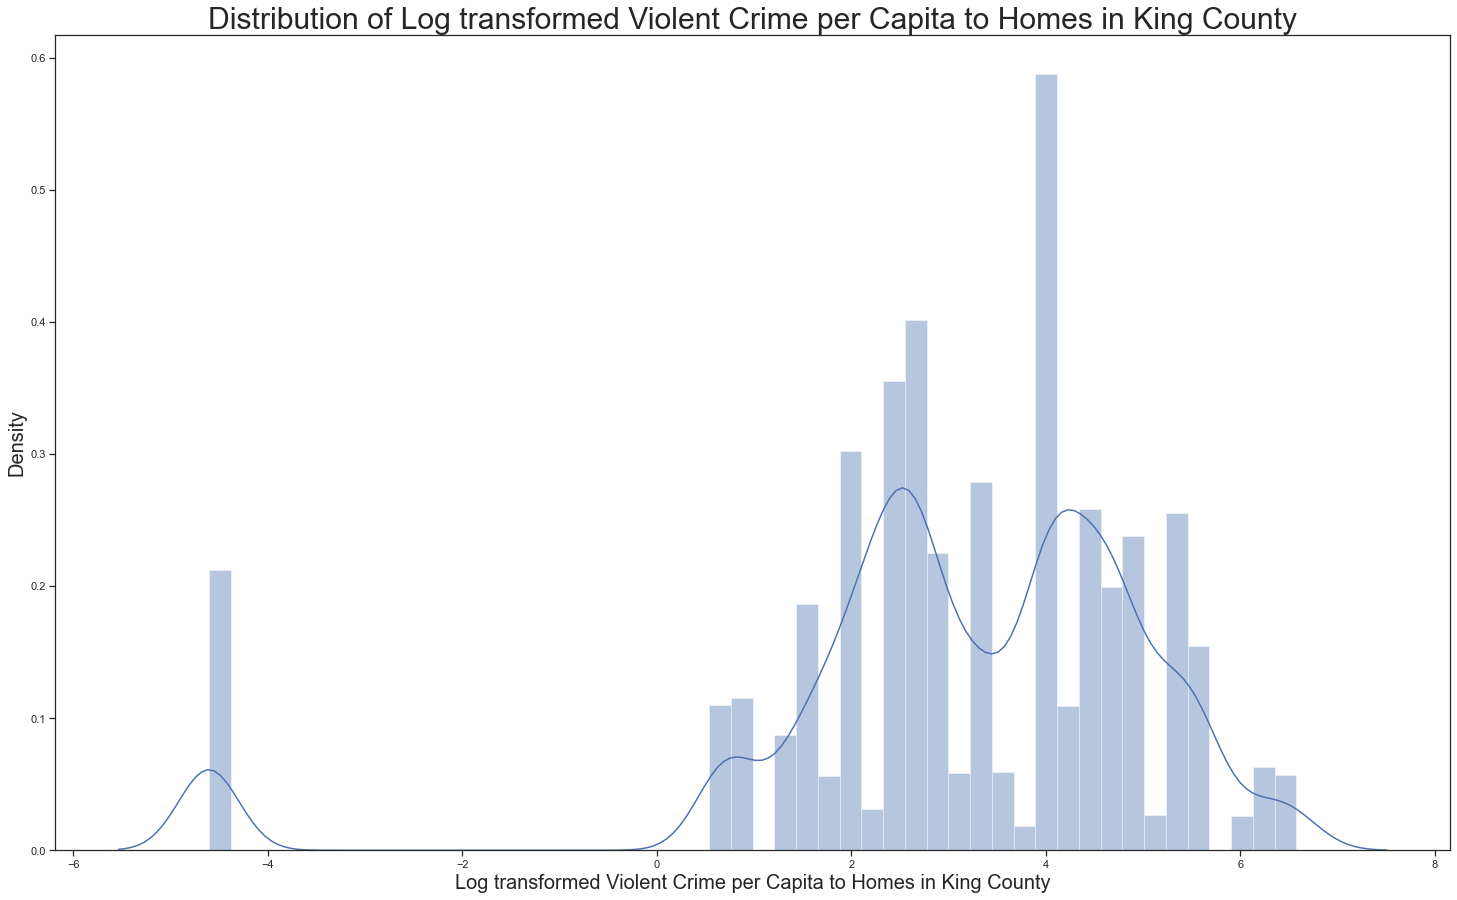

In [44]:
df_norm['viol_crime_log'] = df['viol_crime'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['viol_crime_log'])
plt.title('Distribution of Log transformed Violent Crime per Capita to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Violent Crime per Capita to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['viol_crime_log'].skew())
print('Kurtosis:', df_norm['viol_crime_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.446427968746056
Kurtosis: 6.620649963131532


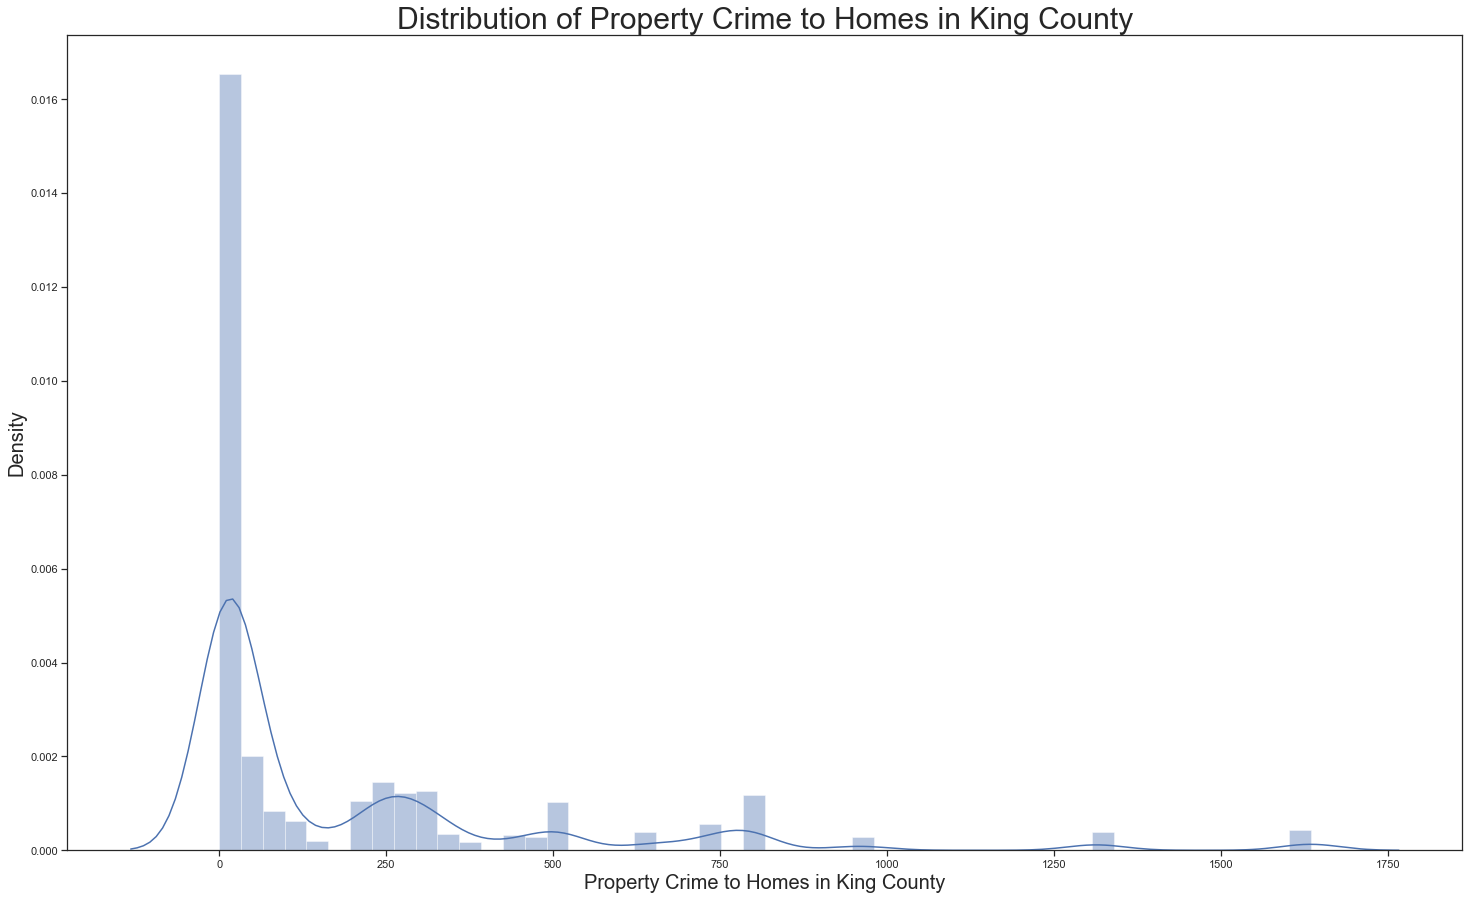

In [45]:
plt.figure(figsize=(25,15))
sns.distplot(df['prop_crime'])
plt.title('Distribution of Property Crime to Homes in King County', fontsize=30)
plt.xlabel('Property Crime to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['prop_crime'].skew())
print('Kurtosis:', df['prop_crime'].kurt())


In [46]:
# Before transforming the feature of Property crime per capita I need to change the values that have zeros in them 
df.loc[df['prop_crime']==0, 'prop_crime']=0.01
# I will replace these values with 0.01.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.375170473963413
Kurtosis: 2.2328608118731146


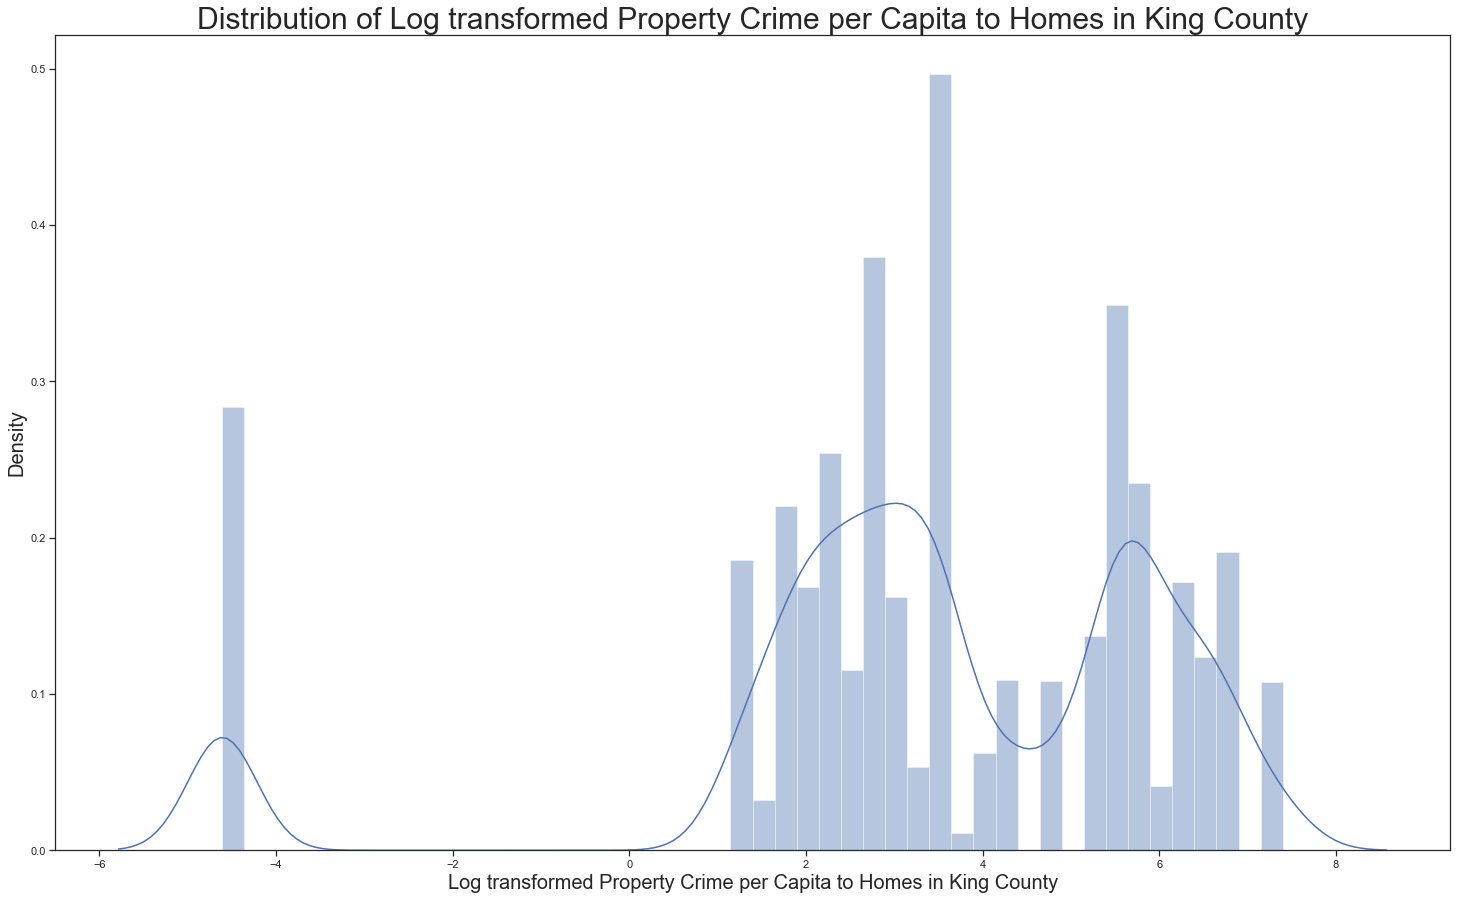

In [47]:
df_norm['prop_crime_log'] = df['prop_crime'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['prop_crime_log'])
plt.title('Distribution of Log transformed Property Crime per Capita to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Property Crime per Capita to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['prop_crime_log'].skew())
print('Kurtosis:', df_norm['prop_crime_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.5965762599990407
Kurtosis: 7.468152662512402


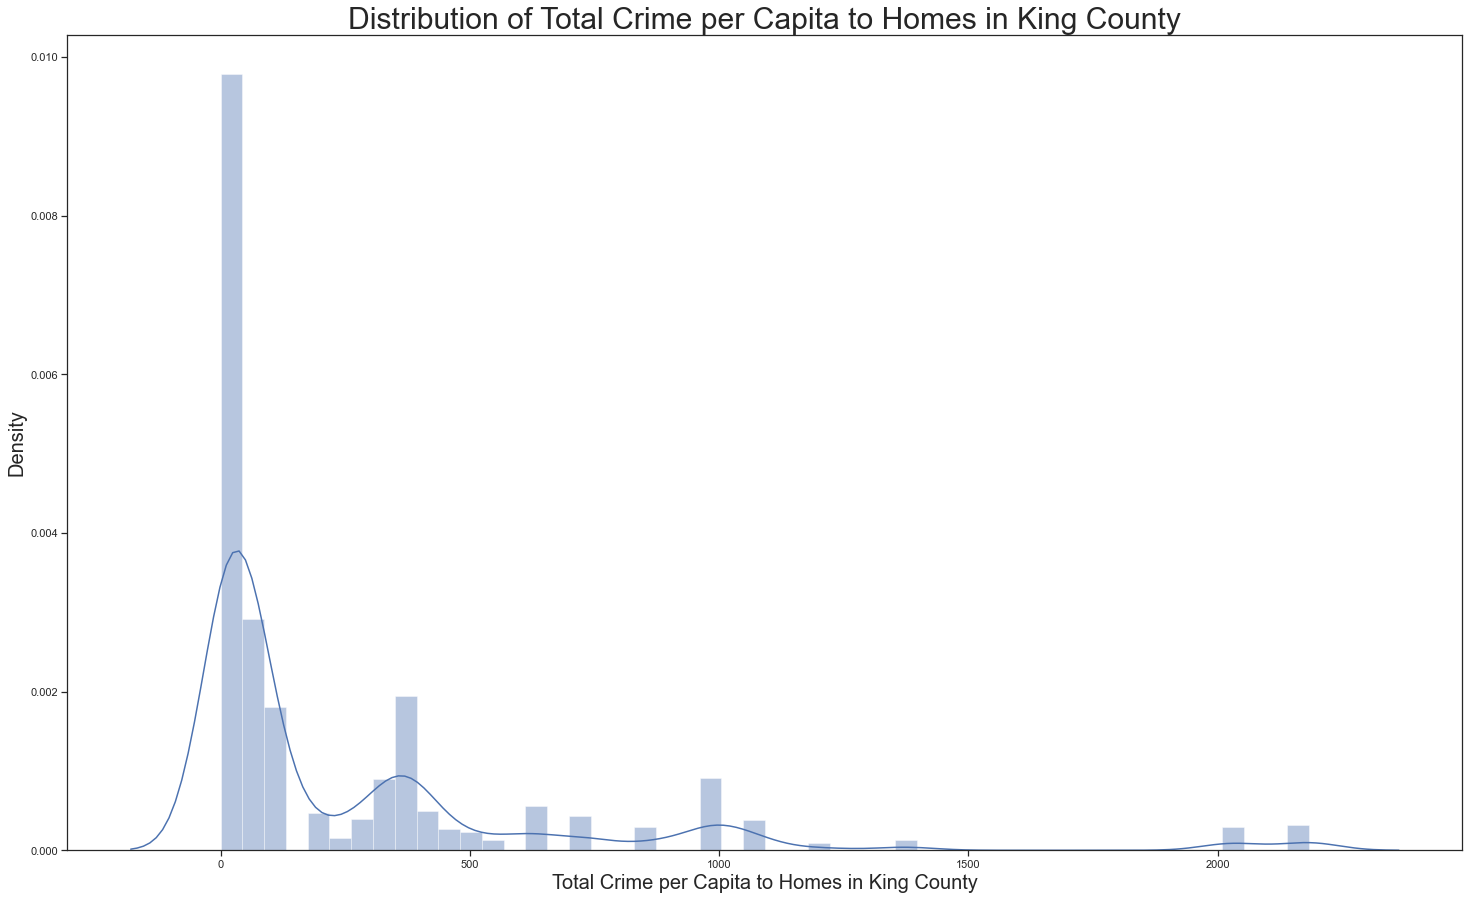

In [48]:

plt.figure(figsize=(25,15))
sns.distplot(df['totalcrime_percapita'])
plt.title('Distribution of Total Crime per Capita to Homes in King County', fontsize=30)
plt.xlabel('Total Crime per Capita to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['totalcrime_percapita'].skew())
print('Kurtosis:', df['totalcrime_percapita'].kurt())


In [49]:
# Before transforming the feature of Property crime per capita I need to change the values that have zeros in them 
df.loc[df['totalcrime_percapita']==0, 'totalcrime_percapita']=0.01
# I will replace these values with 0.01.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.011044362489384
Kurtosis: 3.444589435646787


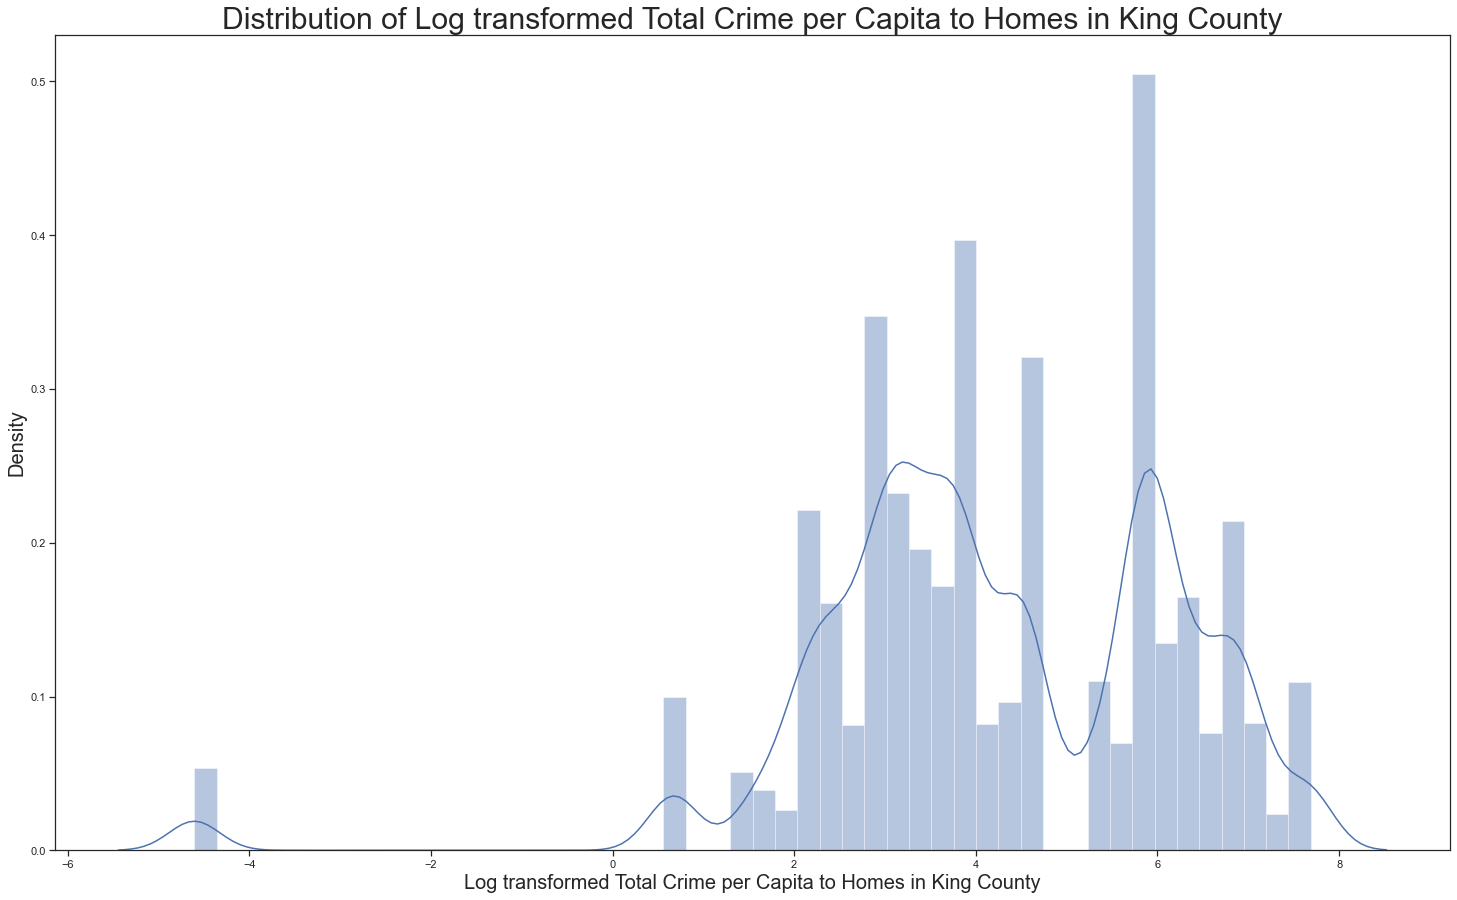

In [50]:
df_norm['totalcrime_percapita_log'] = df['totalcrime_percapita'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['totalcrime_percapita_log'])
plt.title('Distribution of Log transformed Total Crime per Capita to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Total Crime per Capita to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['totalcrime_percapita_log'].skew())
print('Kurtosis:', df_norm['totalcrime_percapita_log'].kurt())

When looking through the distribution of the the total crime per capita, violent crime per capita, and property crime per capita I noticed a large part of the data has a value equal to zero. This effects the ability to transform the data.
You have a few options to work around this. 
1. You remove that part of the data
2. keep the data as is at a cost of having a poor R^2
3. Binning your data

We will try all of these and see which works best.

The following distributions are the binned features for total crime per capita and walk_score

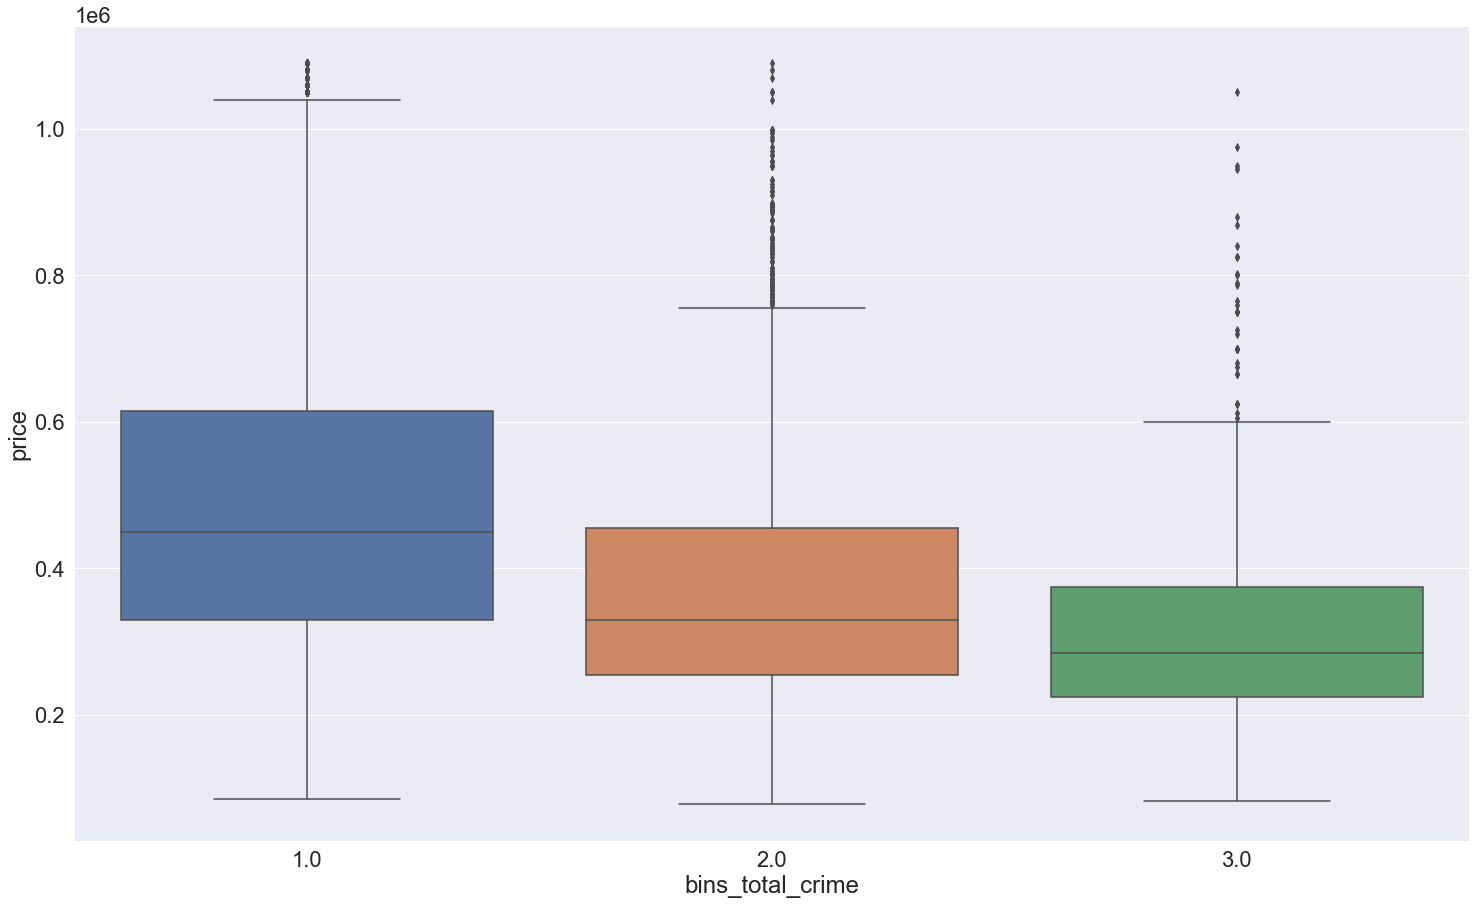

In [51]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="bins_total_crime", y="price", data=df)

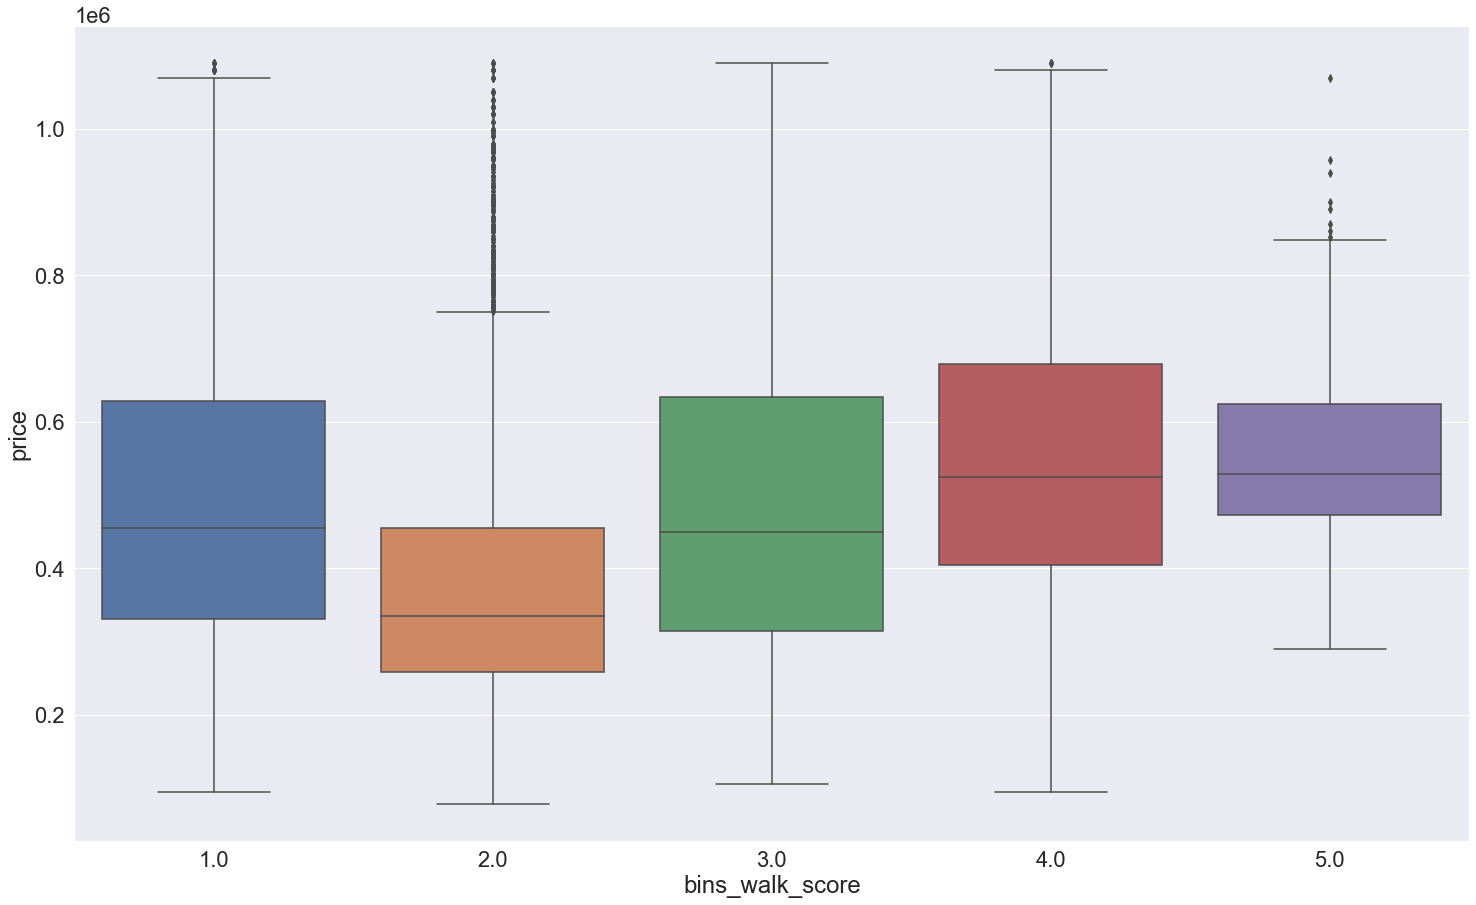

In [52]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="bins_walk_score", y="price", data=df)

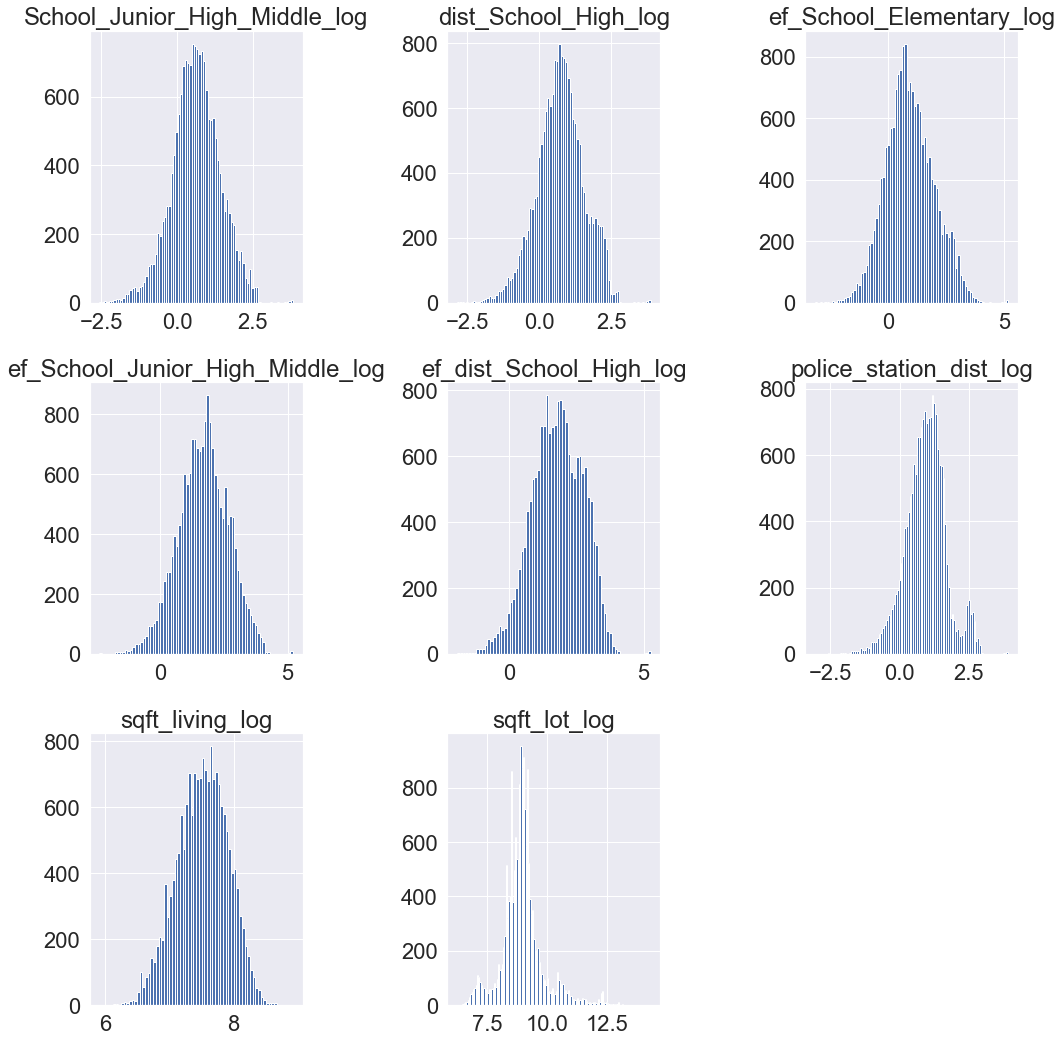

In [53]:
df_cont = df[['School_Junior_High_Middle','dist_School_High','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','police_station_dist','sqft_living','sqft_lot']]
log_names = [f'{column}_log' for column in df_cont.columns]

data_pc_log = np.log(df_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [15,15], bins = 'auto')
plt.tight_layout()


In [54]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 11 columns):
log_price                   18109 non-null float64
log_School_Elementary       18109 non-null float64
log_School_K_12             18109 non-null float64
ef_School_K_12_log          18109 non-null float64
School_dist_avg_log         18109 non-null float64
ef_School_dist_avg_log      18109 non-null float64
medical_dist_log            18109 non-null float64
transport_dist_log          18109 non-null float64
viol_crime_log              18103 non-null float64
prop_crime_log              18103 non-null float64
totalcrime_percapita_log    18103 non-null float64
dtypes: float64(11)
memory usage: 1.5 MB


In [55]:
df_norm = pd.concat([df_norm,data_pc_log], axis=1)

In [56]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 19 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
School_dist_avg_log                 18109 non-null float64
ef_School_dist_avg_log              18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
viol_crime_log                      18103 non-null float64
prop_crime_log                      18103 non-null float64
totalcrime_percapita_log            18103 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_Sch

In [57]:
df_categ = df[['grade','bathrooms','grade_rank','waterfront','district','bins_walk_score','bins_total_crime']]

In [58]:
df_norm = pd.concat([df_norm,df_categ], axis=1)

In [59]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 26 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
School_dist_avg_log                 18109 non-null float64
ef_School_dist_avg_log              18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
viol_crime_log                      18103 non-null float64
prop_crime_log                      18103 non-null float64
totalcrime_percapita_log            18103 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_Sch

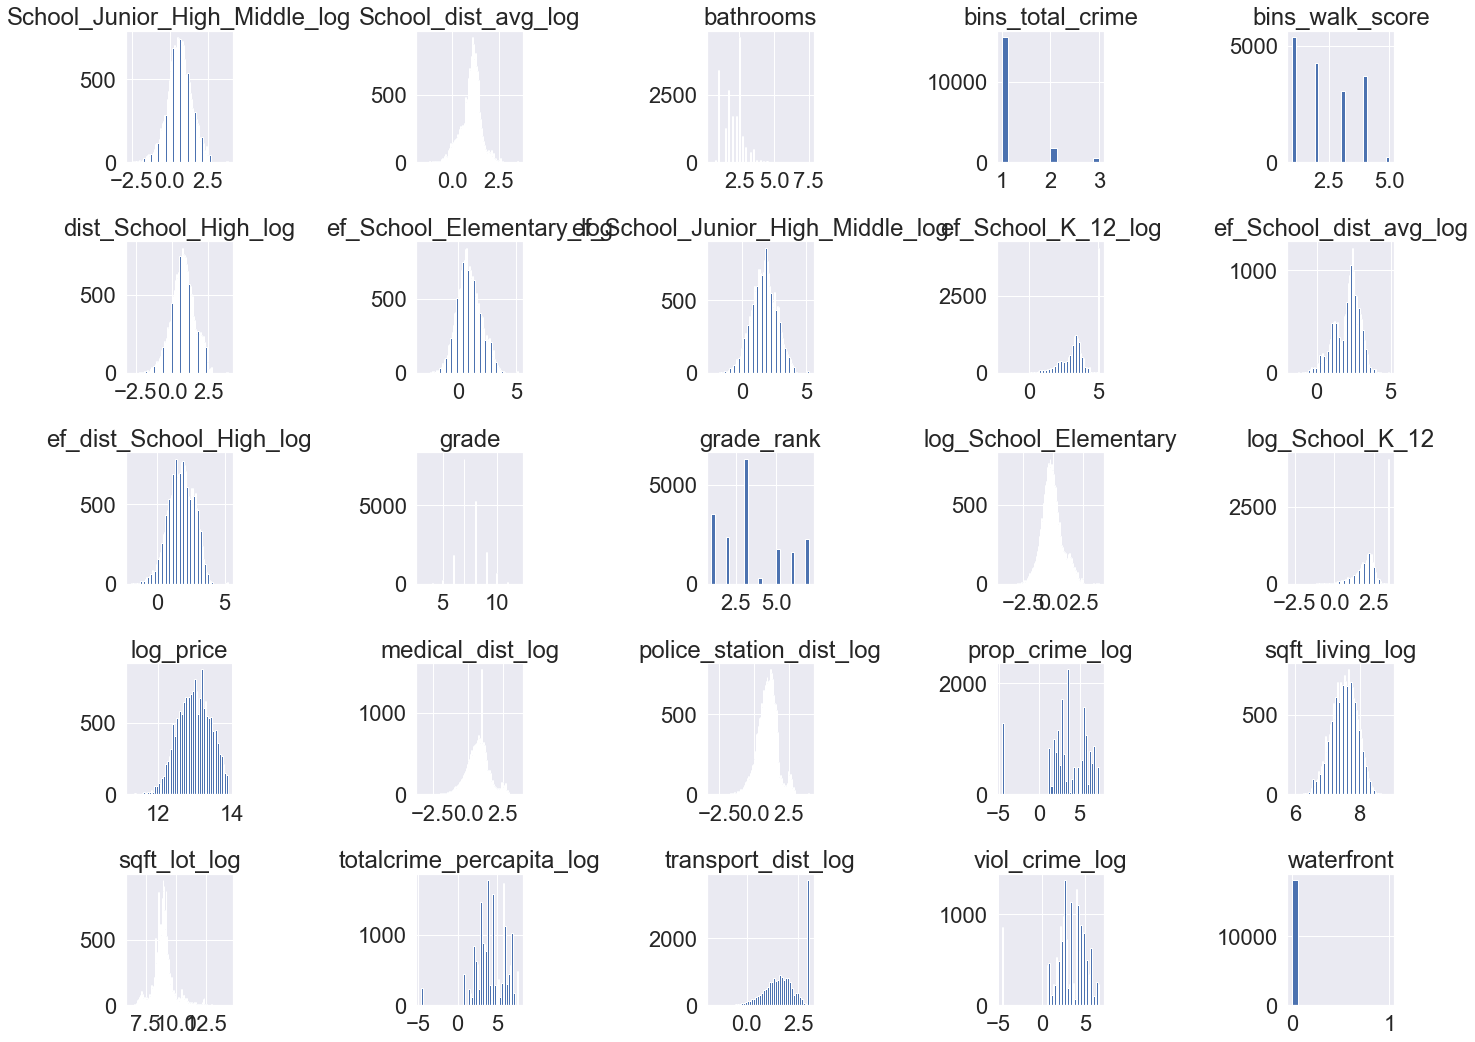

In [60]:
df_norm.hist(figsize=(20,15), bins='auto')
plt.tight_layout()

In [61]:
grade_dummy = pd.get_dummies(df_norm.grade, prefix='grade', drop_first=True)
grade_rank_dummy = pd.get_dummies(df_norm.grade_rank, prefix='grade_rank', drop_first=True)
bins_walk_score_dummy = pd.get_dummies(df_norm.bins_walk_score, prefix='bins_walk_score', drop_first=True)
bins_total_crime_dummy = pd.get_dummies(df_norm.bins_total_crime, prefix='bins_total_crime', drop_first=True)

df_processed_norm = pd.concat([df_norm, grade_dummy, grade_rank_dummy, bins_walk_score_dummy, bins_total_crime_dummy], axis=1)

df_processed_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 47 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
School_dist_avg_log                 18109 non-null float64
ef_School_dist_avg_log              18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
viol_crime_log                      18103 non-null float64
prop_crime_log                      18103 non-null float64
totalcrime_percapita_log            18103 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_Sch

In [62]:
df_processed_norm.columns = df_processed_norm.columns.str.replace('.','_')

In [63]:
df_processed_norm = df_processed_norm.drop(['grade','grade_rank','bins_walk_score','bins_total_crime'], axis=1)

In [64]:
df_processed_norm.drop(['district'], axis=1, inplace=True)

In [65]:
df_processed_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 42 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
School_dist_avg_log                 18109 non-null float64
ef_School_dist_avg_log              18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
viol_crime_log                      18103 non-null float64
prop_crime_log                      18103 non-null float64
totalcrime_percapita_log            18103 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_Sch

In [66]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233371B2BA8>,
      dtype=object)

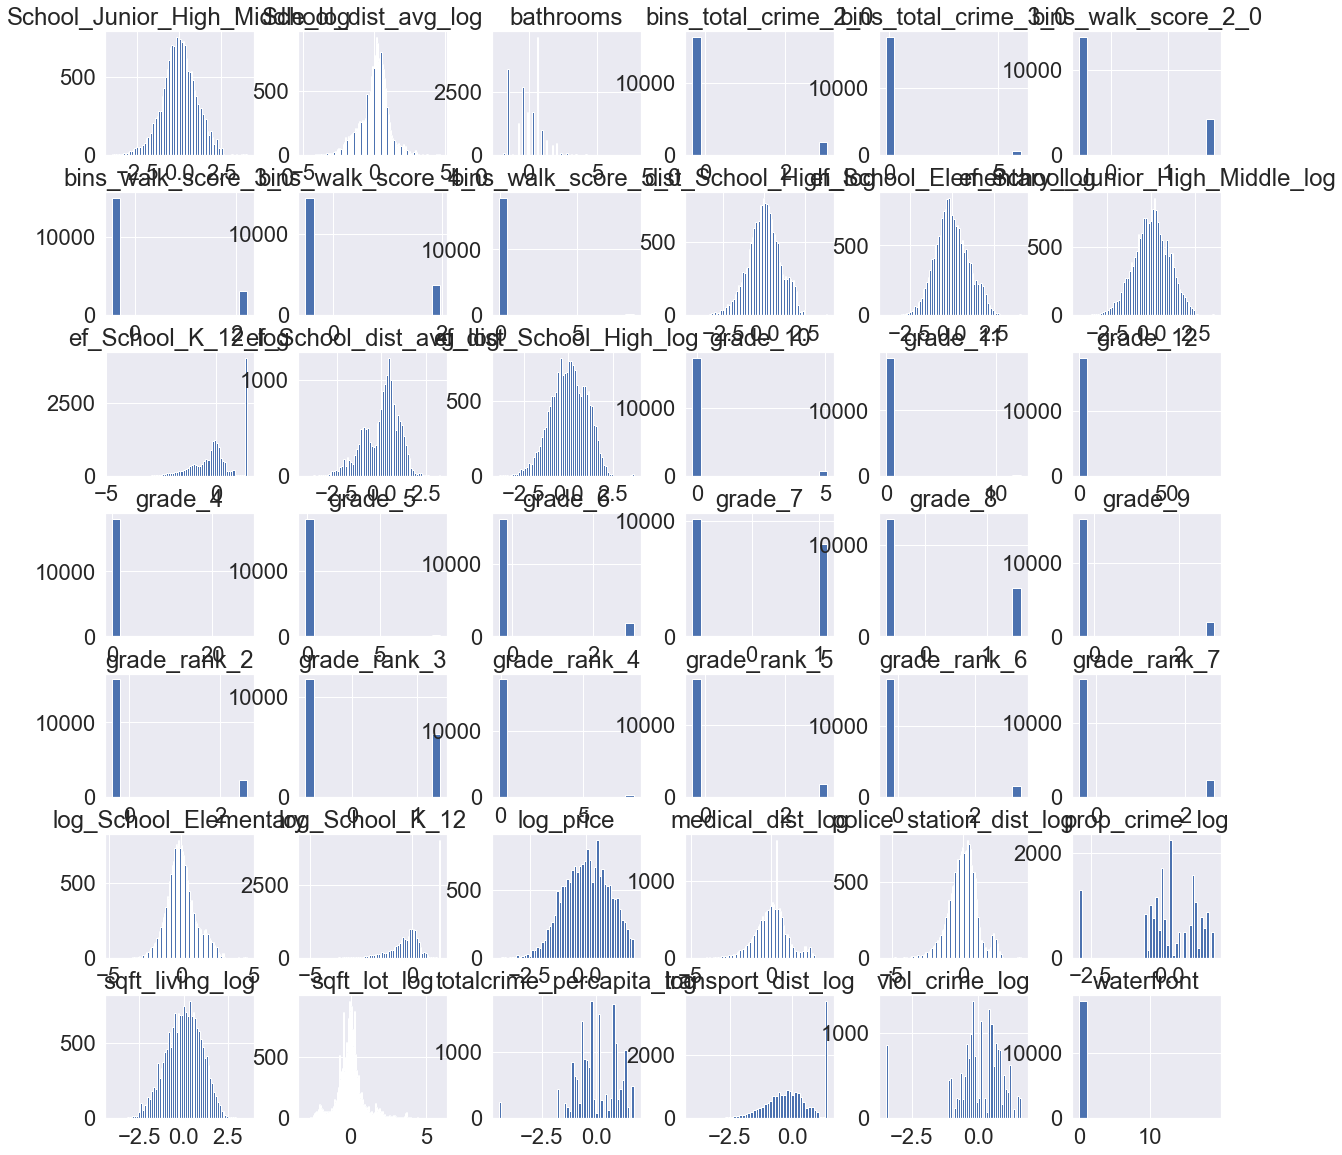

In [67]:
df_norm_final = df_processed_norm.apply(normalize)
df_norm_final.hist(figsize  = [20, 20], color='b', bins= 'auto')

In [68]:
df_norm_final.to_csv('df_norm_final', index=False)

# Transfromation Technique: Quantile Transformation

In [69]:
df_cont_quantile = df.drop(['waterfront', 'grade', 'zipcode', 'lat', 'long', 'district','grades','grade_rank','coor','prop_crime',
                            'viol_crime', 'totalcrime_percapita', 'walking_score', 'bins_walk_score','bins_total_crime'], axis=1)
df_cont_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 17 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
ef_School_K_12                  18109 non-null float64
transport_dist                  18109 non-null float64
medical_dist                    18109 non-null float64
police_station_dist             18109 non-null float64
School_dist_avg                 18109 non-null float64
ef_School_dist_

In [70]:
df_quantile = pd.concat([df_cont_quantile, grade_dummy, grade_rank_dummy, bins_walk_score_dummy, bins_total_crime_dummy], axis=1)
df_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 38 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
ef_School_K_12                  18109 non-null float64
transport_dist                  18109 non-null float64
medical_dist                    18109 non-null float64
police_station_dist             18109 non-null float64
School_dist_avg                 18109 non-null float64
ef_School_dist_

In [71]:
df_quantile.columns = df_quantile.columns.str.replace('.','_')

In [72]:
df_cont_quantile1 = df[['price','School_Elementary','School_K_12','School_Junior_High_Middle','dist_School_High','ef_School_K_12','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','police_station_dist','medical_dist','transport_dist','sqft_living','sqft_lot']]
df_cont_quantile1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 14 columns):
price                           18109 non-null float64
School_Elementary               18109 non-null float64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_K_12                  18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
police_station_dist             18109 non-null float64
medical_dist                    18109 non-null float64
transport_dist                  18109 non-null float64
sqft_living                     18109 non-null int64
sqft_lot                        18109 non-null int64
dtypes: float64(12), int64(2)
memory usage: 1.9 MB


In [73]:
transform = df_quantile.columns.tolist()

In [74]:
df_quantile

,price,bathrooms,sqft_lot,sqft_living,School_K_12,School_Junior_High_Middle,School_Elementary,dist_School_High,ef_School_Junior_High_Middle,ef_dist_School_High,...,grade_rank_4,grade_rank_5,grade_rank_6,grade_rank_7,bins_walk_score_2_0,bins_walk_score_3_0,bins_walk_score_4_0,bins_walk_score_5_0,bins_total_crime_2_0,bins_total_crime_3_0
0,538000.0,2.25,7242,2570,11.140996,1.012163,0.395590,1.424494,3.036488,4.273482,...,0,0,0,0,0,1,0,0,0,0
1,180000.0,1.00,10000,770,3.402627,4.019878,0.179572,0.822000,8.039757,1.644000,...,0,0,0,0,0,0,0,0,0,0
2,604000.0,3.00,5000,1960,13.790617,2.338692,1.692124,2.204664,7.016075,6.613991,...,0,0,0,0,0,0,1,0,0,0
3,510000.0,2.00,8080,1680,7.330850,2.089249,1.149859,1.129238,2.089249,1.129238,...,0,0,0,0,0,0,0,0,0,0
4,257500.0,2.25,6819,1715,1.830627,2.351809,1.111754,2.267955,16.462666,15.875688,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,475000.0,2.50,1294,1310,10.350240,1.483939,0.089681,1.780232,4.451818,5.340697,...,0,0,0,0,0,1,0,0,0,0
18105,360000.0,2.50,1131,1530,9.517683,0.623003,1.353518,1.325666,1.869008,3.976999,...,0,0,0,0,0,0,1,0,0,0
18106,400000.0,2.50,5813,2310,10.420255,0.616743,0.988853,2.213985,4.317199,15.497896,...,0,0,0,1,1,0,0,0,0,1
18107,402101.0,0.75,1350,1020,3.263548,0.552658,0.388024,1.211531,1.657975,3.634592,...,0,0,0,0,0,0,1,0,0,0


In [75]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df_quantile[transform] = qt.fit_transform(df_quantile[transform])

In [76]:
df_quantile

,price,bathrooms,sqft_lot,sqft_living,School_K_12,School_Junior_High_Middle,School_Elementary,dist_School_High,ef_School_Junior_High_Middle,ef_dist_School_High,...,grade_rank_4,grade_rank_5,grade_rank_6,grade_rank_7,bins_walk_score_2_0,bins_walk_score_3_0,bins_walk_score_4_0,bins_walk_score_5_0,bins_total_crime_2_0,bins_total_crime_3_0
0,0.428893,0.130848,-0.087753,0.826698,0.420534,-0.834046,-1.021385,-0.495160,-0.590113,-0.333169,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,-1.985876,-1.295363,0.616541,-2.107953,-1.132856,0.992674,-1.935598,-1.156272,0.429194,-1.349869,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,0.694311,1.442543,-0.695908,0.128317,0.639904,0.312582,0.850115,0.074437,0.284062,0.086594,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
3,0.320290,-0.105580,0.164366,-0.236799,-0.273741,0.160503,0.437138,-0.793555,-0.959181,-1.705278,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,-1.123415,0.130848,-0.210920,-0.190162,-1.627404,0.320928,0.394440,0.114781,1.116627,0.963461,...,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,0.179102,0.605955,-1.862288,-0.821412,0.298703,-0.302296,-2.761840,-0.216228,-0.196783,-0.121228,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338
18105,-0.378977,0.605955,-2.110438,-0.455640,0.154930,-1.395221,0.632365,-0.592775,-1.055202,-0.417769,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
18106,-0.177827,0.605955,-0.450321,0.542335,0.311984,-1.406199,0.243180,0.079020,-0.226118,0.935471,...,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
18107,-0.162296,-2.877846,-1.810944,-1.401177,-1.165800,-1.528277,-1.046581,-0.707265,-1.172414,-0.517097,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338


In [77]:
df_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 38 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null float64
sqft_living                     18109 non-null float64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
ef_School_K_12                  18109 non-null float64
transport_dist                  18109 non-null float64
medical_dist                    18109 non-null float64
police_station_dist             18109 non-null float64
School_dist_avg                 18109 non-null float64
ef_School_d

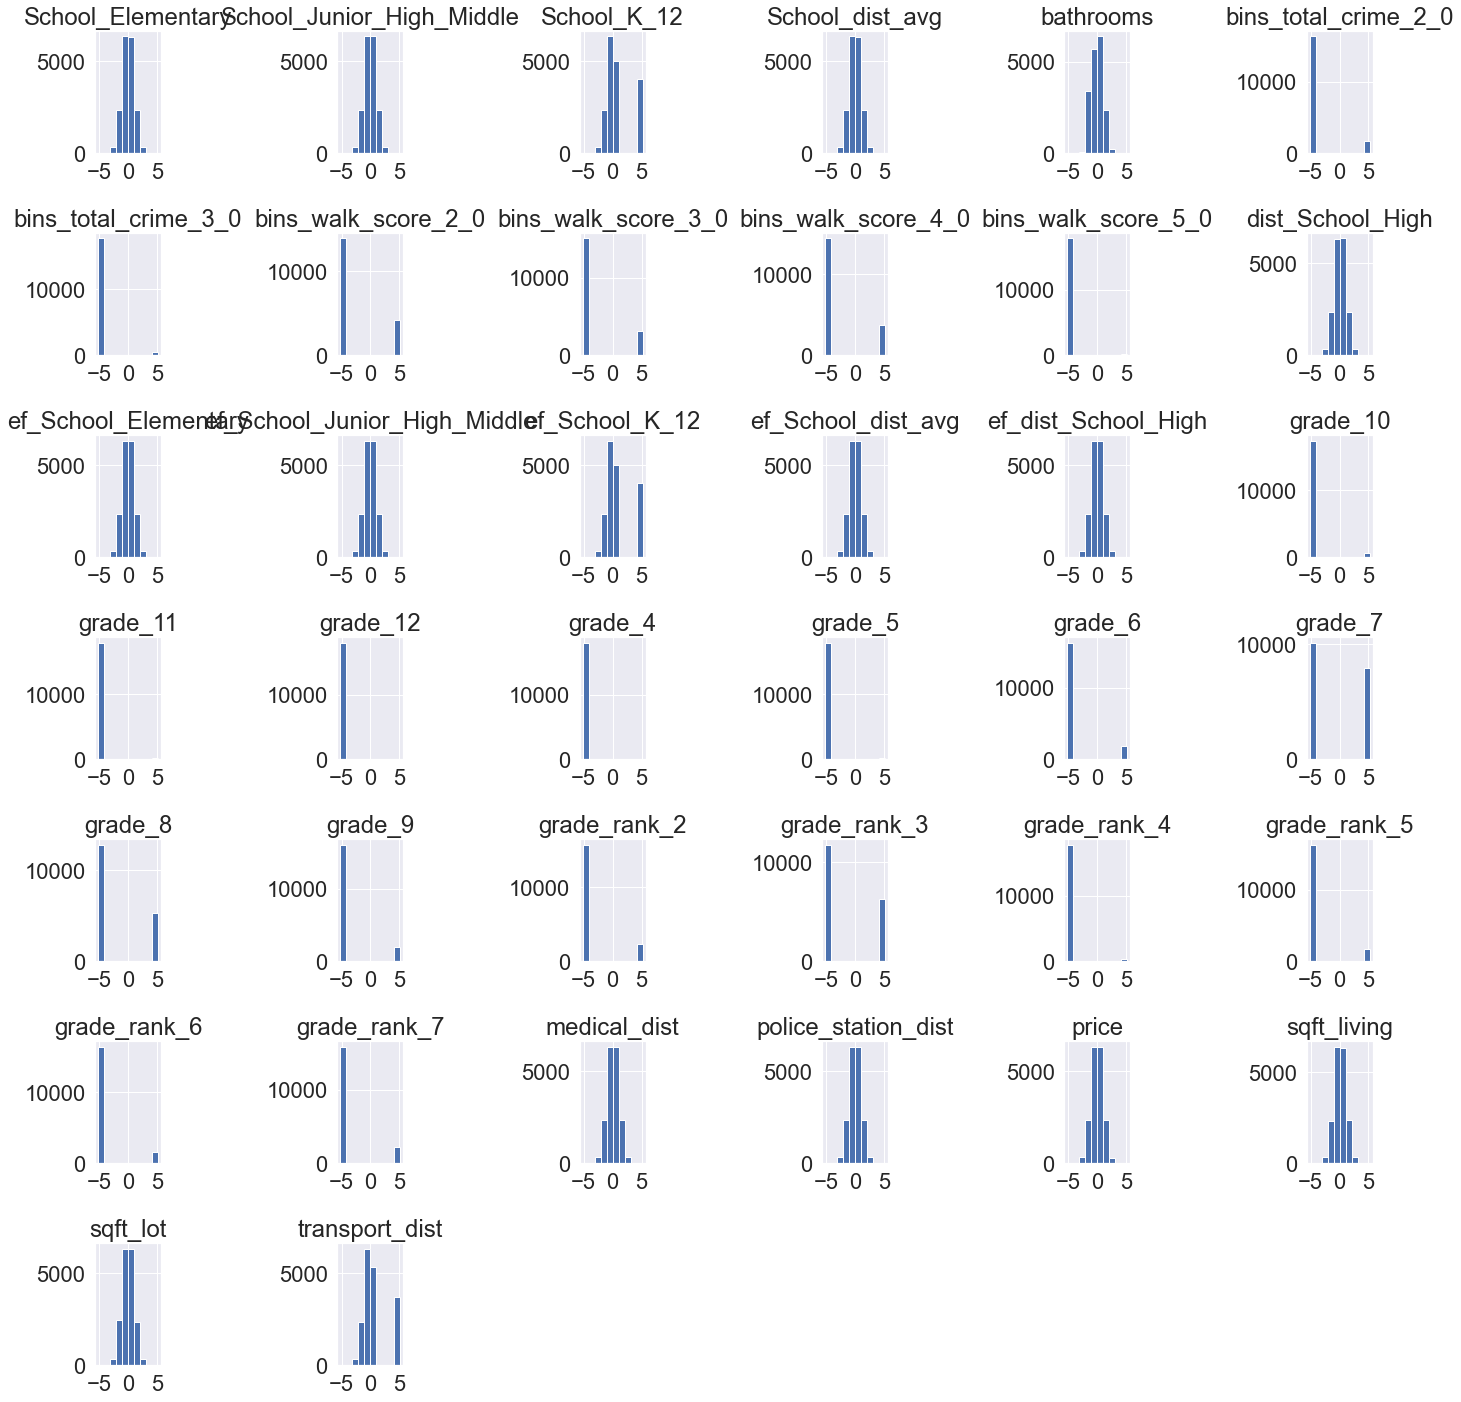

In [78]:
df_quantile.hist(figsize=(20,20))
plt.tight_layout();

In [79]:
df_quantile.to_csv('df_processed_quantile', index=False)